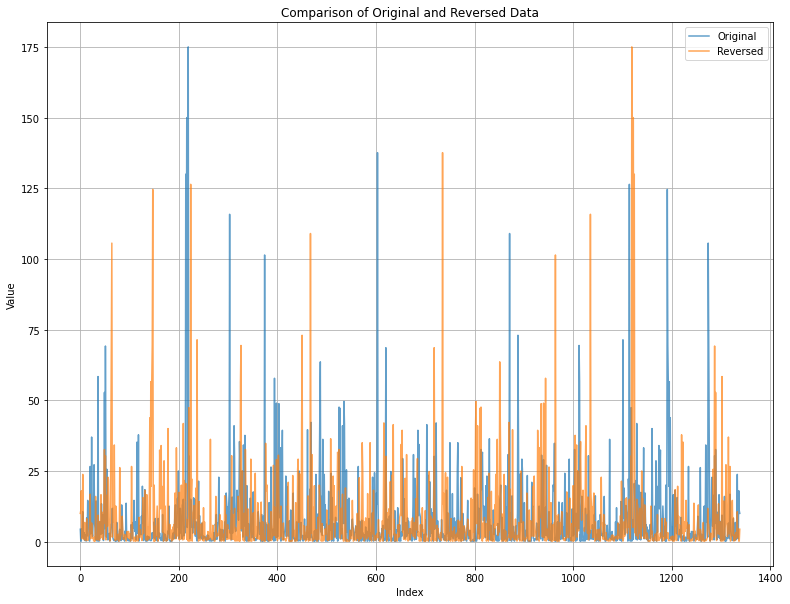

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_rbi_above0.csv')
df_interev = pd.read_csv('CT_rbi_above0REV.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])

# Plot the data with transparency
plt.figure(figsize=(13, 10))
plt.plot(df_inter.index, df_inter['VALUE'], label='Original', alpha=0.7)  # Use index for x-axis
plt.plot(df_interev.index, df_interev['VALUE'], label='Reversed', alpha=0.7)  # Use index for x-axis
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Original and Reversed Data')
plt.legend()
plt.grid(True)
plt.show()


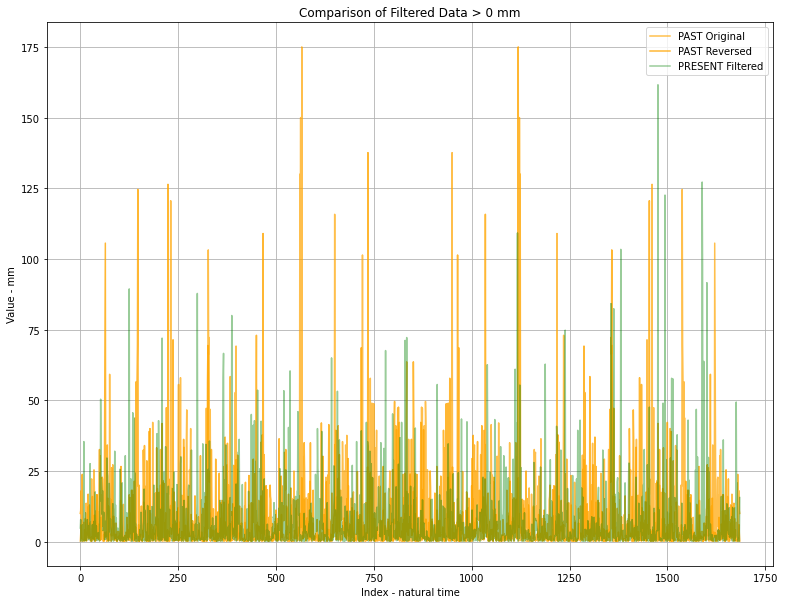

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_PASTS.csv')
df_interev = pd.read_csv('CT_PASTSREV.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])

# Filtered data from 3170_filtered.csv
df_filtered = pd.read_csv('CT_PRESENTS.csv')
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

# Filter the data between 2002 and 2022
#start_date = '2002-01-01'
#end_date = '2022-12-31'
#df_filtered = df_filtered[(df_filtered['DATE'] >= start_date) & (df_filtered['DATE'] <= end_date)]

# Plot the data with transparency
plt.figure(figsize=(13, 10))
plt.plot(df_inter.index, df_inter['VALUE'], label='PAST Original',color= 'orange', alpha=0.7)
plt.plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed',color= 'orange', alpha=0.8)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT Filtered',color= 'green', alpha=0.4)  # Overlay filtered data
plt.xlabel('Index - natural time')
plt.ylabel('Value - mm')
#plt.xlim(1125,1150)
plt.title('Comparison of Filtered Data > 0 mm')
plt.legend()
plt.grid(True)
plt.savefig('CTComparison of Filtered Data > 0 mm').jpg', dpi=300)
plt.show()


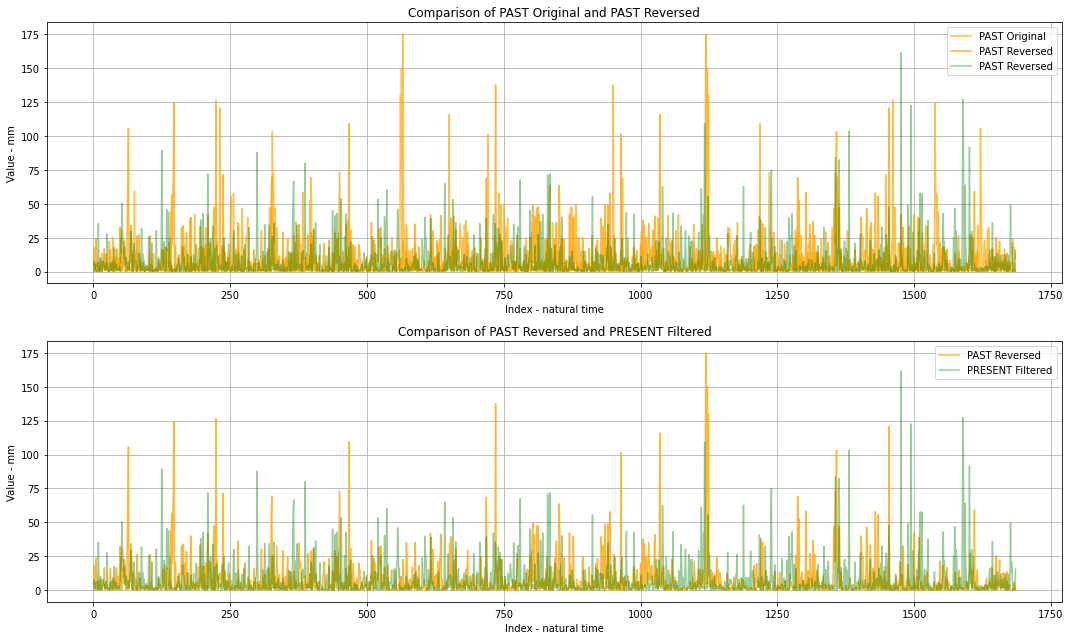

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_PASTS.csv')
df_interev = pd.read_csv('CT_PASTSREV.csv')
df_filtered = pd.read_csv('CT_PRESENTS.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

# Create a 1x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 9))

# Plot on the first subplot
axes[0].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='orange', alpha=0.7)
axes[0].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
axes[0].plot(df_filtered.index, df_filtered['VALUE'], label='PAST Reversed', color='green', alpha=0.4)
axes[0].set_xlabel('Index - natural time')
axes[0].set_ylabel('Value - mm')
axes[0].set_title('Comparison of PAST Original and PAST Reversed')
axes[0].legend()
axes[0].grid(True)

# Plot on the second subplot
axes[1].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
axes[1].plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT Filtered', color='green', alpha=0.4)
axes[1].set_xlabel('Index - natural time')
axes[1].set_ylabel('Value - mm')
axes[1].set_title('Comparison of PAST Reversed and PRESENT Filtered')
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


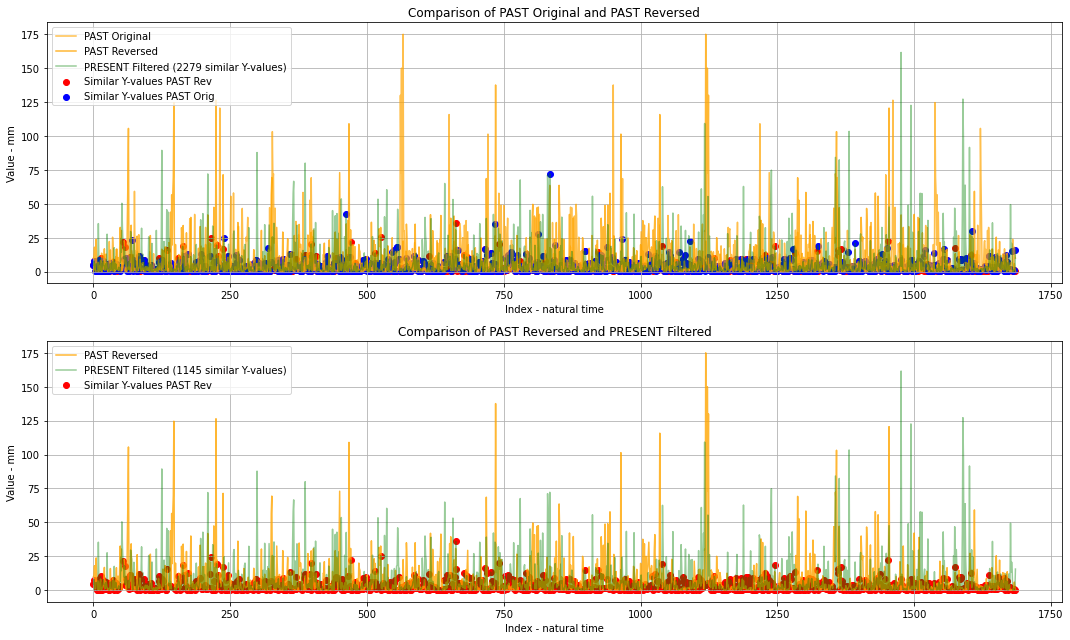

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_PASTS.csv')
df_interev = pd.read_csv('CT_PASTSREV.csv')
df_filtered = pd.read_csv('CT_PRESENTS.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

# Find similar y-values indices for PAST Reversed
similar_indices_interev = []
tolerance = 9  # Adjust this tolerance value as needed

for idx in df_filtered.index:
    if abs(df_interev['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_interev.append(idx)

# Find similar y-values indices for PAST Original and PRESENT Filtered
similar_indices_inter = []

for idx in df_filtered.index:
    if abs(df_inter['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_inter.append(idx)

# Create a 1x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 9))

# Calculate the total count of similarity for the first plot
total_similarity_count_first = len(similar_indices_interev) + len(similar_indices_inter)

# Plot on the first subplot
plot1 = axes[0].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='orange', alpha=0.7)
plot2 = axes[0].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
plot3 = axes[0].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered ({total_similarity_count_first} similar Y-values)', color='green', alpha=0.4)
scatter1 = axes[0].scatter(similar_indices_interev, df_filtered['VALUE'][similar_indices_interev], color='red', marker='o')
scatter2 = axes[0].scatter(similar_indices_inter, df_filtered['VALUE'][similar_indices_inter], color='blue', marker='o')
axes[0].set_xlabel('Index - natural time')
axes[0].set_ylabel('Value - mm')
axes[0].set_title('Comparison of PAST Original and PAST Reversed')
axes[0].grid(True)

# Create the first legend with corresponding counts for the first plot
legend1 = axes[0].legend(handles=[plot1[0], plot2[0], plot3[0], scatter1, scatter2],
                          labels=['PAST Original', 'PAST Reversed', f'PRESENT Filtered ({total_similarity_count_first} similar Y-values)', 'Similar Y-values PAST Rev', 'Similar Y-values PAST Orig'],
                          loc='upper left')

# Plot on the second subplot
plot4 = axes[1].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
plot5 = axes[1].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered ({len(similar_indices_interev)} similar Y-values)', color='green', alpha=0.4)
scatter3 = axes[1].scatter(similar_indices_interev, df_filtered['VALUE'][similar_indices_interev], color='red', marker='o')
axes[1].set_xlabel('Index - natural time')
axes[1].set_ylabel('Value - mm')
axes[1].set_title('Comparison of PAST Reversed and PRESENT Filtered')
axes[1].grid(True)

# Create the second legend with the similarity count for the second plot
legend2 = axes[1].legend(handles=[plot4[0], plot5[0], scatter3],
                          labels=['PAST Reversed', f'PRESENT Filtered ({len(similar_indices_interev)} similar Y-values)', 'Similar Y-values PAST Rev'],
                          loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


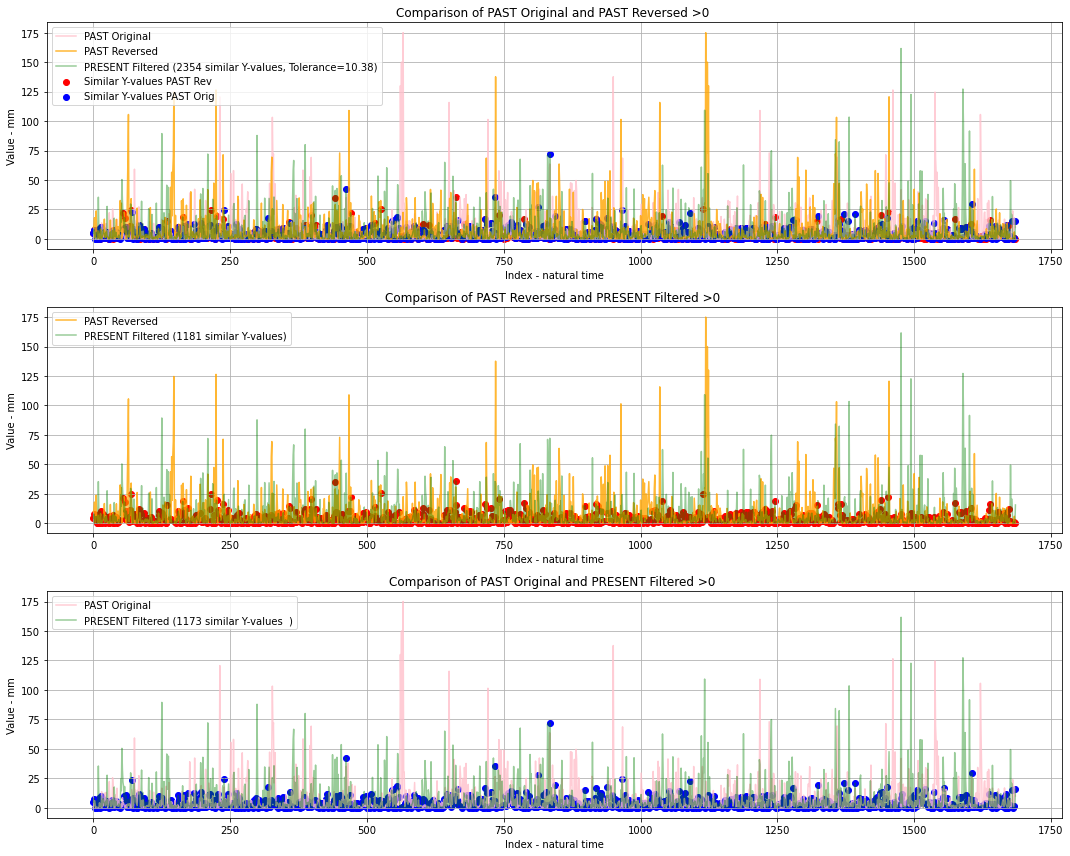

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_past.csv')
df_interev = pd.read_csv('CT_pastREV.csv')
df_filtered = pd.read_csv('CT_present.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

# Find similar y-values indices for PAST Reversed
similar_indices_interev = []
tolerance = 10.38# Adjust this tolerance value as needed

for idx in df_filtered.index:
    if abs(df_interev['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_interev.append(idx)

# Find similar y-values indices for PAST Original and PRESENT Filtered
similar_indices_inter = []

for idx in df_filtered.index:
    if abs(df_inter['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_inter.append(idx)

# Find similar y-values indices for PAST Original and PRESENT Filtered (Third Plot)
similar_indices_inter_third = []

for idx in df_filtered.index:
    if abs(df_inter['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_inter_third.append(idx)

# Create a 1x3 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# Calculate the total count of similarity for the first plot
total_similarity_count_first = len(similar_indices_interev) + len(similar_indices_inter)

# Plot on the first subplot
plot1 = axes[0].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='pink', alpha=0.8)
plot2 = axes[0].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
plot3 = axes[0].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered ({total_similarity_count_first} similar Y-values)', color='green', alpha=0.4)
scatter1 = axes[0].scatter(similar_indices_interev, df_filtered['VALUE'][similar_indices_interev], color='red', marker='o')
scatter2 = axes[0].scatter(similar_indices_inter, df_filtered['VALUE'][similar_indices_inter], color='blue', marker='o')
axes[0].set_xlabel('Index - natural time')
axes[0].set_ylabel('Value - mm')
#axes[0].set_xlim(0,250)
#axes[0].set_ylim(0,10)

axes[0].set_title('Comparison of PAST Original and PAST Reversed >0 ')
axes[0].grid(True)
#axes[0].legend()  # Add legend to the first subplot
axes[0].legend(handles=[plot1[0], plot2[0], plot3[0], scatter1, scatter2],
               labels=['PAST Original', 'PAST Reversed', f'PRESENT Filtered ({total_similarity_count_first} similar Y-values, Tolerance={tolerance})', 'Similar Y-values PAST Rev', 'Similar Y-values PAST Orig'],
               loc='upper left')


# Calculate the total count of similarity for the second plot
total_similarity_count_second = len(similar_indices_interev)

# Plot on the second subplot
plot4 = axes[1].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
plot5 = axes[1].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered ({total_similarity_count_second} similar Y-values)', color='green', alpha=0.4)
scatter3 = axes[1].scatter(similar_indices_interev, df_filtered['VALUE'][similar_indices_interev], color='red', marker='o')
axes[1].set_xlabel('Index - natural time')
axes[1].set_ylabel('Value - mm')
axes[1].set_title('Comparison of PAST Reversed and PRESENT Filtered >0 ')
axes[1].grid(True)
axes[1].legend()  # Add legend to the second subplot

# Calculate the total count of similarity for the third plot
total_similarity_count_third = len(similar_indices_inter_third)

# Plot on the third subplot
plot6 = axes[2].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='pink', alpha=0.8)
plot7 = axes[2].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered ({total_similarity_count_third} similar Y-values  )', color='green', alpha=0.4)
scatter4 = axes[2].scatter(similar_indices_inter_third, df_filtered['VALUE'][similar_indices_inter_third], color='blue', marker='o')
axes[2].set_xlabel('Index - natural time')
axes[2].set_ylabel('Value - mm')
axes[2].set_title('Comparison of PAST Original and PRESENT Filtered >0 ')
axes[2].grid(True)
axes[2].legend()  # Add legend to the third subplot

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('CTComparisonofFilteredData0mm.jpg', dpi=300)

# Show the plots
plt.show()


In [236]:
# Combine PAST Original and PAST Reversed datasets
combined_df = pd.concat([df_inter, df_interev]).drop_duplicates().reset_index(drop=True)
#combined_df = pd.concat([df_inter, df_interev]).reset_index(drop=True)

similar_indices_combined = []

for idx in df_filtered.index:
    if idx < len(combined_df) and abs(combined_df['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_combined.append(idx)
# Total number of values in the unique dataset
total_values_combined = len(combined_df)

# Total number of similar values that match conditions in PRESENT Filtered
total_similar_values = len(similar_indices_combined)

# Calculate percentage of similarity
percentage_similarity = (total_similar_values / total_values_combined) * 100

print(f"Percentage of similarity overlapping with PRESENT Filtered relative to the unique combined length: {percentage_similarity:.2f}%")


Percentage of similarity overlapping with PRESENT Filtered relative to the unique combined length: 69.57%


In [ ]:
START

In [378]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_past.csv')
df_interev = pd.read_csv('CT_pastREV.csv')
df_filtered = pd.read_csv('CT_present.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

# Find similar y-values indices for PAST Reversed
similar_indices_interev = []
tolerance = 10.38

In [379]:
similar_indices_original = []

for idx in df_filtered.index:
    if idx < len(df_inter) and abs(df_inter['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_original.append(idx)

total_values_original = len(df_inter)
total_similar_values_original = len(similar_indices_original)
percentage_similarity_original = (total_similar_values_original / total_values_original) * 100

print(f"Percentage of similarity overlapping with PRESENT Filtered relative to the original length: {percentage_similarity_original:.2f}%")


Percentage of similarity overlapping with PRESENT Filtered relative to the original length: 69.57%


In [380]:
similar_indices_present_reversed = []

for idx in df_filtered.index:
    if idx < len(df_interev) and abs(df_interev['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_present_reversed.append(idx)

total_values_reversed = len(df_interev)
total_similar_values_present_reversed = len(similar_indices_present_reversed)
percentage_similarity_present_reversed = (total_similar_values_present_reversed / total_values_reversed) * 100

print(f"Percentage of similarity overlapping with PRESENT Filtered relative to the reversed length: {percentage_similarity_present_reversed:.2f}%")


Percentage of similarity overlapping with PRESENT Filtered relative to the reversed length: 70.05%


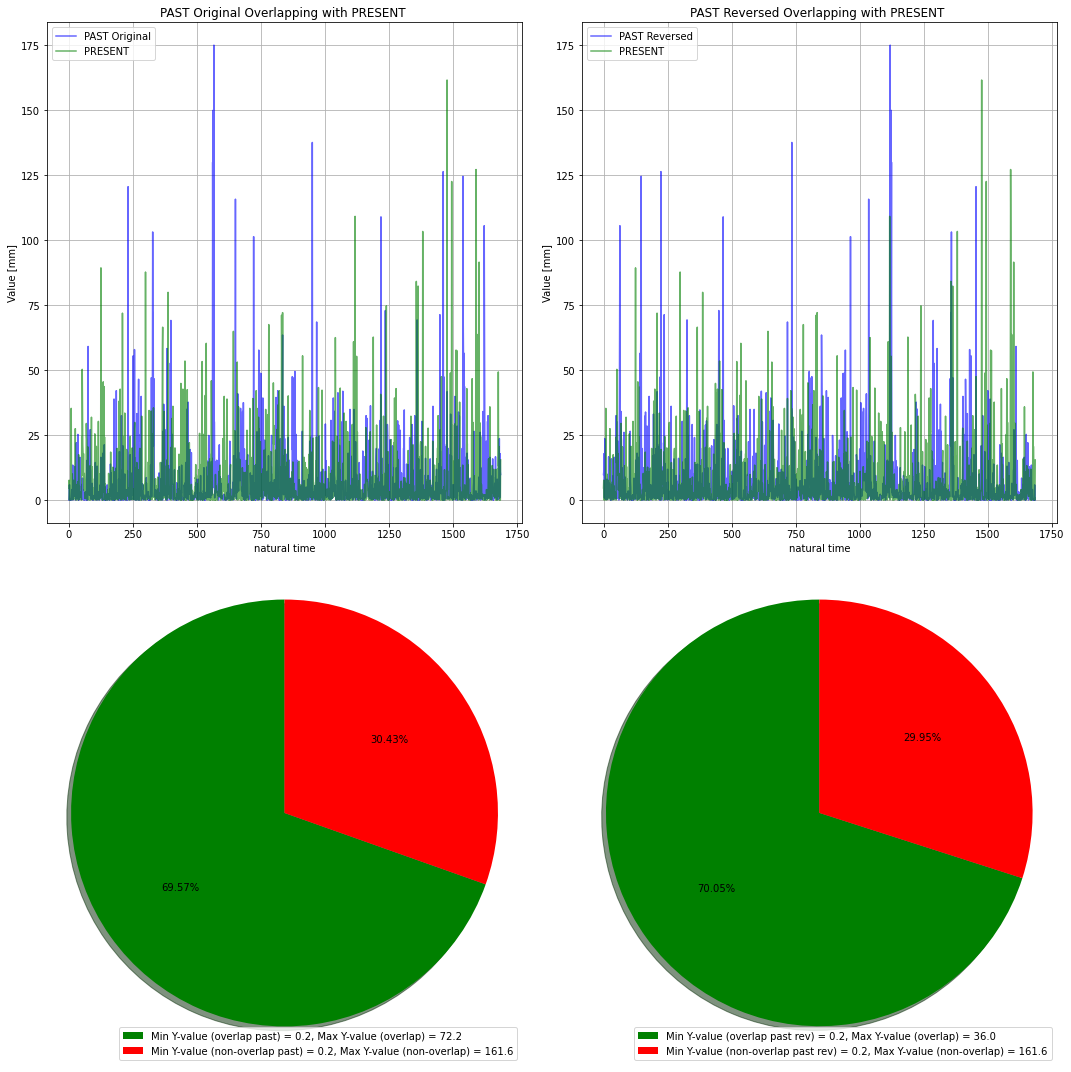

In [371]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded the data and calculated the percentage overlap values...

# Calculation for PAST Original vs. PRESENT
min_similar_y_value_original = df_filtered['VALUE'].iloc[similar_indices_original].min()
max_similar_y_value_original = df_filtered['VALUE'].iloc[similar_indices_original].max()
non_overlap_indices_original = set(df_inter.index) - set(similar_indices_original)
min_non_similar_y_value_original = df_filtered['VALUE'].iloc[list(non_overlap_indices_original)].min()
max_non_similar_y_value_original = df_filtered['VALUE'].iloc[list(non_overlap_indices_original)].max()

# Calculation for PAST Reversed vs. PRESENT
min_similar_y_value_reversed = df_filtered['VALUE'].iloc[similar_indices_present_reversed].min()
max_similar_y_value_reversed = df_filtered['VALUE'].iloc[similar_indices_present_reversed].max()
non_overlap_indices_reversed = set(df_interev.index) - set(similar_indices_present_reversed)
min_non_similar_y_value_reversed = df_filtered['VALUE'].iloc[list(non_overlap_indices_reversed)].min()
max_non_similar_y_value_reversed = df_filtered['VALUE'].iloc[list(non_overlap_indices_reversed)].max()

# Initialize the figure
plt.figure(figsize=(15,15))

colors = ['green','red']

# First plot (top-left): Overlapping points between PAST and PRESENT
plt.subplot(2, 2, 1)
plt.plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('natural time')
plt.ylabel('Value [mm]')
plt.title('PAST Original Overlapping with PRESENT ')
plt.legend(loc='upper left')
plt.grid(True)

# Second plot (top-right): Overlapping points between PAST Reversed and PRESENT
plt.subplot(2, 2, 2)
plt.plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('natural time')
plt.ylabel('Value [mm]')
plt.title('PAST Reversed Overlapping with PRESENT ')
plt.legend(loc='upper left')
plt.grid(True)

# Third plot: Pie chart for similarity overlap between PAST and PRESENT (bottom-left)
plt.subplot(2, 2, 3)
labels_overlap_original = ['Overlap with PRESENT', 'No Overlap']
sizes_overlap_original = [percentage_similarity_original, 100-percentage_similarity_original]
wedges_original, texts_original, autotexts_original = plt.pie(sizes_overlap_original, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
#plt.title('Percentage Overlap between PRESENT Filtered Data and PAST')
legend_labels_original = [
    f'Min Y-value (overlap past) = {min_similar_y_value_original}, Max Y-value (overlap) = {max_similar_y_value_original}',
    f'Min Y-value (non-overlap past) = {min_non_similar_y_value_original}, Max Y-value (non-overlap) = {max_non_similar_y_value_original}'
]
plt.legend(handles=wedges_original, labels=legend_labels_original, loc='lower right')

# Fourth plot: Pie chart for similarity overlap between PAST Reversed and PRESENT (bottom-right)
plt.subplot(2, 2, 4)
labels_overlap_reversed = ['Overlap with PRESENT', 'No Overlap']
sizes_overlap_reversed = [percentage_similarity_present_reversed, 100-percentage_similarity_present_reversed]
wedges_reversed, texts_reversed, autotexts_reversed = plt.pie(sizes_overlap_reversed, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
#plt.title('Percentage Overlap between PRESENT Filtered Data and PAST Reversed')
legend_labels_reversed = [
    f'Min Y-value (overlap past rev) = {min_similar_y_value_reversed}, Max Y-value (overlap) = {max_similar_y_value_reversed}',
    f'Min Y-value (non-overlap past rev) = {min_non_similar_y_value_reversed}, Max Y-value (non-overlap) = {max_non_similar_y_value_reversed}'
]
plt.legend(handles=wedges_reversed, labels=legend_labels_reversed, loc='lower right')

# Adjust the layout
plt.tight_layout()
#plt.savefig('CTComparisonofPASTPASTPAST.jpg', dpi=300)

plt.show()


In [ ]:
SHUFFLE

Total values: 1686, similar values: 1171, percentage: 69.45432977461448


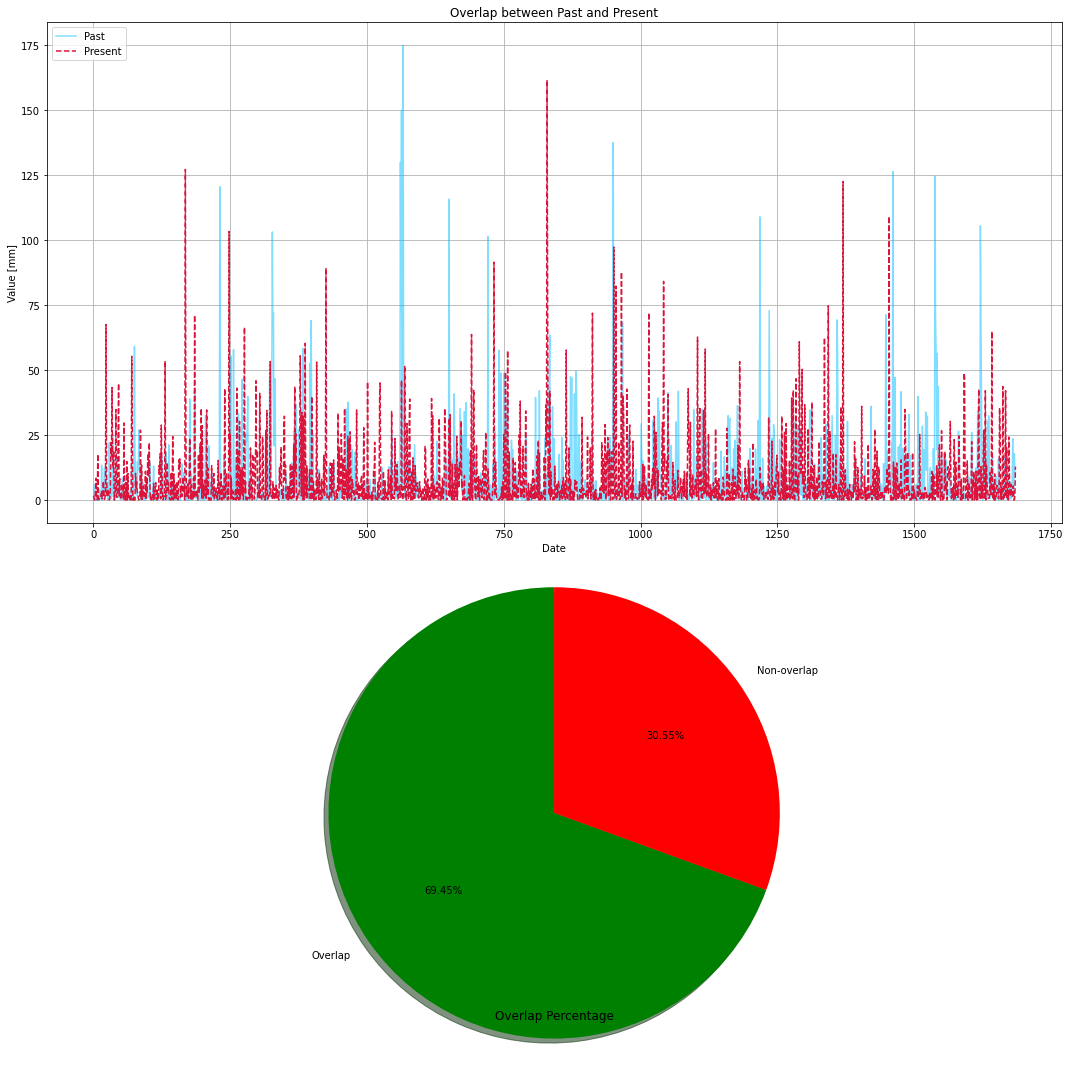

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_past = pd.read_csv('ct_past.csv', parse_dates=['DATE'])
df_present = pd.read_csv('ct_present.csv', parse_dates=['DATE'])

# If you want to shuffle the data, you can use this:
#df_past = df_past.sample(frac=1, random_state=743).reset_index(drop=True)
df_present = df_present.sample(frac=1, random_state=743).reset_index(drop=True)

# Using a fixed tolerance for overlapping
tolerance = 10

# Initialize the figure
plt.figure(figsize=(15, 15))

# Plotting
plt.subplot(2, 1, 1)
plt.plot(df_past.index, df_past['VALUE'], label='Past', color='deepskyblue', alpha=0.5)
plt.plot(df_present.index, df_present['VALUE'], label='Present', color='crimson', linestyle='dashed', alpha=1)

similar_indices = []
for idx in df_past.index:
    if idx < len(df_present) and abs(df_past['VALUE'].iloc[idx] - df_present['VALUE'].iloc[idx]) <= tolerance:
        similar_indices.append(idx)

plt.xlabel('Date')
plt.ylabel('Value [mm]')
plt.title('Overlap between Past and Present')
plt.legend(loc='upper left')
plt.grid(True)

percentage_similarity = (len(similar_indices) / len(df_past)) * 100
print(f"Total values: {len(df_past)}, similar values: {len(similar_indices)}, percentage: {percentage_similarity}")

# Pie chart
plt.subplot(2, 1, 2)
labels_overlap = ['Overlap', 'Non-overlap']
sizes_overlap = [percentage_similarity, 100 - percentage_similarity]
plt.pie(sizes_overlap, labels=labels_overlap, colors=['green', 'red'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Overlap Percentage', y=0.08)

# Adjust the layout
plt.tight_layout()
#plt.savefig('CTOVERLAP.jpg', dpi=300)
plt.show()


In [ ]:
PERMUTATION TEST

Actual data - Total values: 1686, similar values: 1164, percentage: 69.03914590747331
Permutation 1 - Total values: 1686, similar values: 1191, percentage: 70.64056939501779
Permutation 2 - Total values: 1686, similar values: 1174, percentage: 69.63226571767497
Permutation 3 - Total values: 1686, similar values: 1174, percentage: 69.63226571767497
Permutation 4 - Total values: 1686, similar values: 1178, percentage: 69.86951364175563
Permutation 5 - Total values: 1686, similar values: 1174, percentage: 69.63226571767497
Permutation 6 - Total values: 1686, similar values: 1176, percentage: 69.7508896797153
Permutation 7 - Total values: 1686, similar values: 1160, percentage: 68.80189798339265
Permutation 8 - Total values: 1686, similar values: 1161, percentage: 68.86120996441281
Permutation 9 - Total values: 1686, similar values: 1176, percentage: 69.7508896797153
Permutation 10 - Total values: 1686, similar values: 1160, percentage: 68.80189798339265
Permutation 11 - Total values: 1686

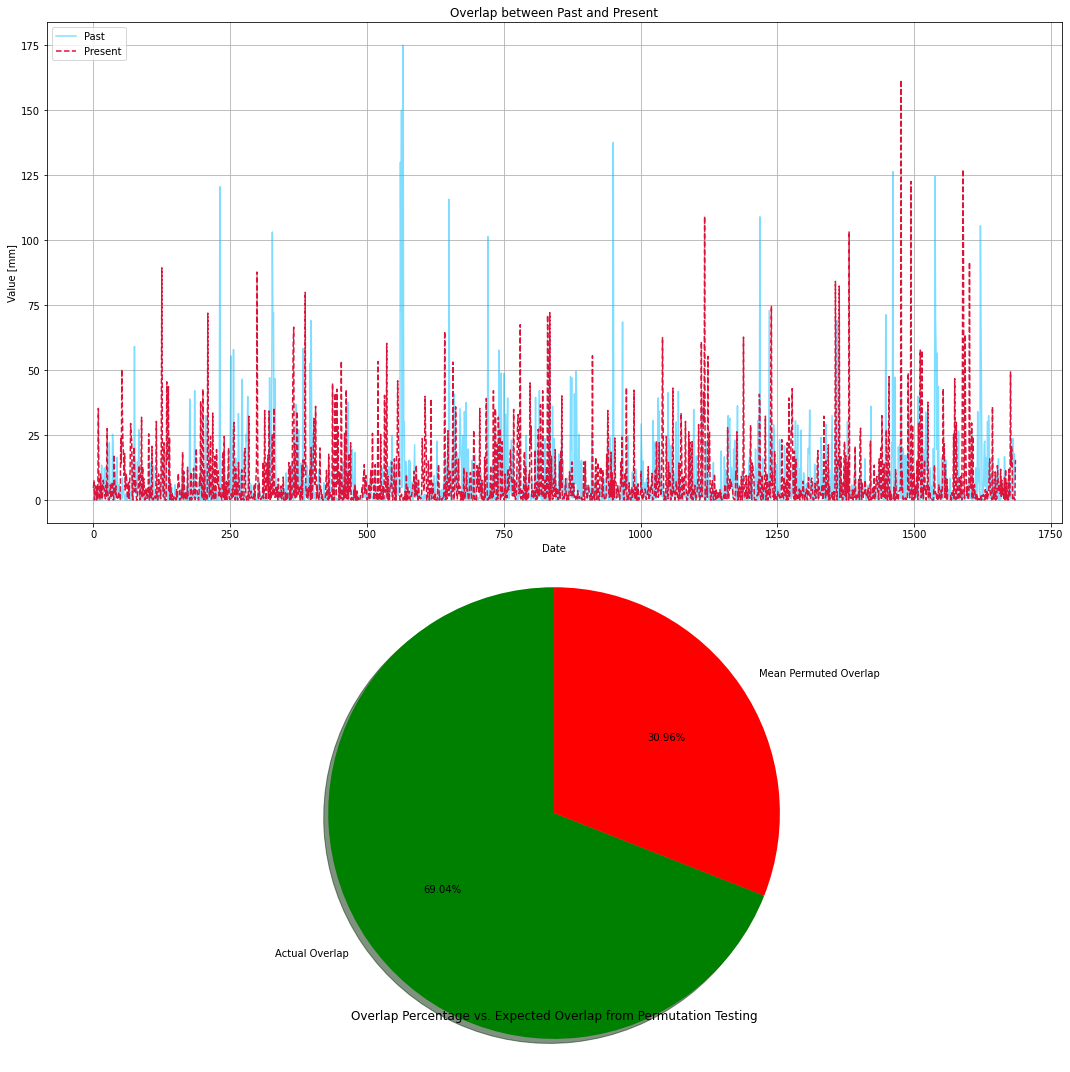

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df_past = pd.read_csv('ct_past.csv', parse_dates=['DATE'])
df_present = pd.read_csv('ct_present.csv', parse_dates=['DATE'])

# Using a fixed tolerance for overlapping
tolerance = 10

# Initialize the figure
plt.figure(figsize=(15, 15))

# Plot the actual data
plt.subplot(2, 1, 1)
plt.plot(df_past.index, df_past['VALUE'], label='Past', color='deepskyblue', alpha=0.5)
plt.plot(df_present.index, df_present['VALUE'], label='Present', color='crimson', linestyle='dashed', alpha=1)

# Find overlap for actual data
similar_indices = []
for idx in df_past.index:
    if idx < len(df_present) and abs(df_past['VALUE'].iloc[idx] - df_present['VALUE'].iloc[idx]) <= tolerance:
        similar_indices.append(idx)

plt.xlabel('Date')
plt.ylabel('Value [mm]')
plt.title('Overlap between Past and Present')
plt.legend(loc='upper left')
plt.grid(True)

percentage_similarity = (len(similar_indices) / len(df_past)) * 100
print(f"Actual data - Total values: {len(df_past)}, similar values: {len(similar_indices)}, percentage: {percentage_similarity}")

# Permutation Testing with 13 repetitions
overlap_percentages = []

for i in range(70):
    # Shuffle the data using permutation
    permuted_past = np.random.permutation(df_past['VALUE'].values)
    permuted_present = np.random.permutation(df_present['VALUE'].values)
    
    # Find overlap for permuted data
    permuted_similar_indices = []
    for idx, value in enumerate(permuted_past):
        if idx < len(permuted_present) and abs(permuted_past[idx] - permuted_present[idx]) <= tolerance:
            permuted_similar_indices.append(idx)

    overlap_percentage = (len(permuted_similar_indices) / len(permuted_past)) * 100
    overlap_percentages.append(overlap_percentage)
    print(f"Permutation {i + 1} - Total values: {len(permuted_past)}, similar values: {len(permuted_similar_indices)}, percentage: {overlap_percentage}")

# Pie chart
plt.subplot(2, 1, 2)
labels_overlap = ['Actual Overlap', 'Mean Permuted Overlap']
#sizes_overlap = [percentage_similarity, np.mean(overlap_percentages)]
sizes_overlap = [percentage_similarity, 100-percentage_similarity]
plt.pie(sizes_overlap, labels=labels_overlap, colors=['green', 'red'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Overlap Percentage vs. Expected Overlap from Permutation Testing', y=0.08)

# Adjust the layout
plt.tight_layout()
#plt.savefig('CTOVERLAP.jpg', dpi=300)
plt.show()


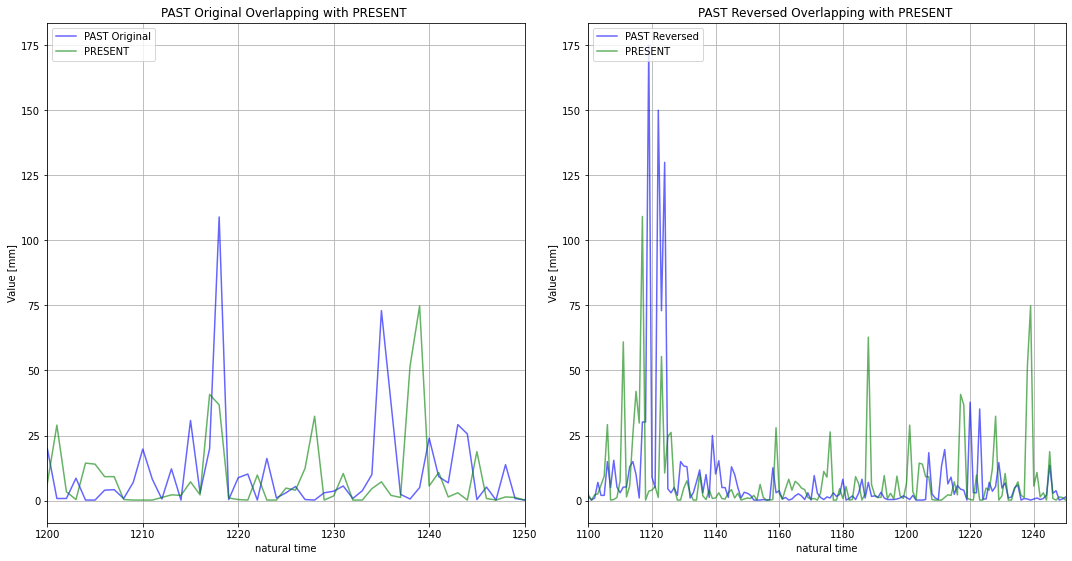

In [383]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded the data and calculated the percentage overlap values...

# Calculation for PAST Original vs. PRESENT
min_similar_y_value_original = df_filtered['VALUE'].iloc[similar_indices_original].min()
max_similar_y_value_original = df_filtered['VALUE'].iloc[similar_indices_original].max()
non_overlap_indices_original = set(df_inter.index) - set(similar_indices_original)
min_non_similar_y_value_original = df_filtered['VALUE'].iloc[list(non_overlap_indices_original)].min()
max_non_similar_y_value_original = df_filtered['VALUE'].iloc[list(non_overlap_indices_original)].max()

# Calculation for PAST Reversed vs. PRESENT
min_similar_y_value_reversed = df_filtered['VALUE'].iloc[similar_indices_present_reversed].min()
max_similar_y_value_reversed = df_filtered['VALUE'].iloc[similar_indices_present_reversed].max()
non_overlap_indices_reversed = set(df_interev.index) - set(similar_indices_present_reversed)
min_non_similar_y_value_reversed = df_filtered['VALUE'].iloc[list(non_overlap_indices_reversed)].min()
max_non_similar_y_value_reversed = df_filtered['VALUE'].iloc[list(non_overlap_indices_reversed)].max()

# Initialize the figure
plt.figure(figsize=(15,15))

colors = ['green','red']

# First plot (top-left): Overlapping points between PAST and PRESENT
plt.subplot(2, 2, 1)
plt.plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('natural time')
plt.ylabel('Value [mm]')
plt.title('PAST Original Overlapping with PRESENT ')
plt.legend(loc='upper left')
plt.xlim(1200,1250)
plt.grid(True)

# Second plot (top-right): Overlapping points between PAST Reversed and PRESENT
plt.subplot(2, 2, 2)
plt.plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('natural time')
plt.ylabel('Value [mm]')
plt.title('PAST Reversed Overlapping with PRESENT ')
plt.legend(loc='upper left')
plt.xlim(1100,1250)
plt.grid(True)


# Adjust the layout
plt.tight_layout()
plt.savefig('CTComparisonofPASTPRESENTzoom.jpg', dpi=300)

plt.show()


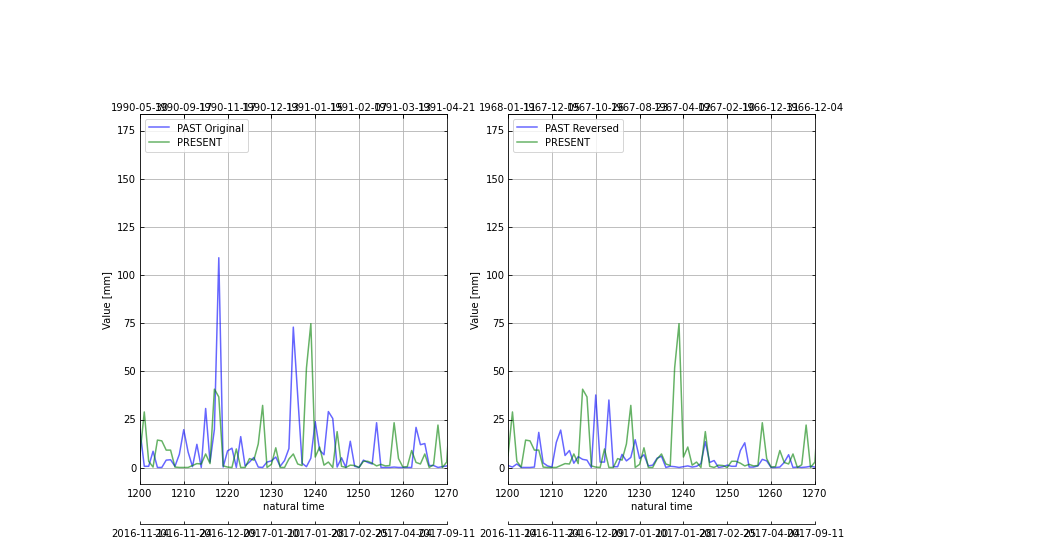

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

# ... (your data loading and preprocessing code)
fig = plt.figure(figsize=(15,15))
# Function to set the secondary and tertiary x-axes
def set_additional_axes(ax, df_past, df_present):
    # Secondary axis for past dates
    ax2 = ax.twiny()
    new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
    ax2.axis["top"] = new_fixed_axis(loc="top", axes=ax2, offset=(0, 0))
    ax2.axis["top"].toggle(all=True)
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    ax2.set_xticklabels(df_past['DATE'].dt.strftime('%Y-%m-%d').iloc[ax.get_xticks().astype(int)], rotation=-90, ha='right')

    # Tertiary axis for present dates
    ax3 = ax.twiny()
    new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
    ax3.axis["bottom"] = new_fixed_axis(loc="bottom", axes=ax3, offset=(0, -40))
    ax3.axis["bottom"].toggle(all=True)
    ax3.set_xlim(ax.get_xlim())
    ax3.set_xticks(ax.get_xticks())
    ax3.set_xticklabels(df_present['DATE'].dt.strftime('%Y-%m-%d').iloc[ax.get_xticks().astype(int)], rotation=90, ha='right')

# First plot (top-left): Overlapping points between PAST and PRESENT
host = host_subplot(2, 2, 1, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('natural time')
plt.ylabel('Value [mm]')
#plt.title('PAST Original Overlapping with PRESENT ')
plt.legend(loc='upper left')
plt.xlim(1200,1270)
plt.grid(True)
set_additional_axes(plt.gca(), df_inter, df_filtered)

# Second plot (top-right): Overlapping points between PAST Reversed and PRESENT
host = host_subplot(2, 2, 2, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('natural time')
plt.ylabel('Value [mm]')
#plt.title('PAST Reversed Overlapping with PRESENT ')
plt.legend(loc='upper left')
plt.xlim(1200,1270)
plt.grid(True)
set_additional_axes(plt.gca(), df_interev, df_filtered)

# Adjust the layout
plt.tight_layout()
plt.savefig('CTComparisonofPASTPRESENTzoom.jpg', dpi=300)

plt.show()


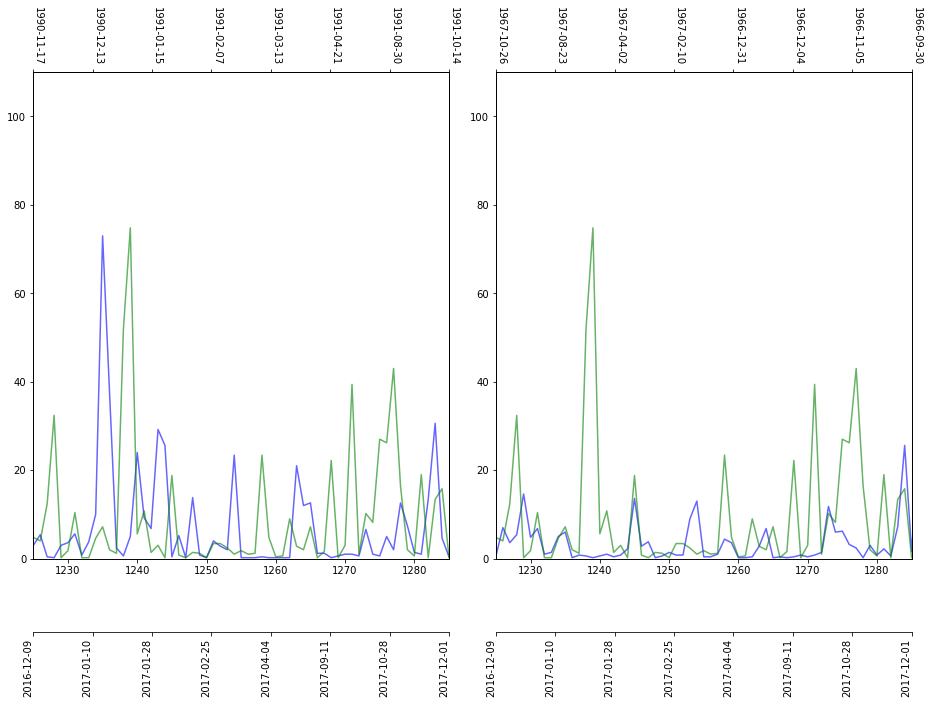

In [414]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your data loading and preprocessing code)

fig, axes = plt.subplots(1, 2, figsize=(13, 10))

def set_additional_axes(ax, df_past, df_present):
    # Secondary axis for past dates
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    ax2.set_xticklabels(df_past['DATE'].dt.strftime('%Y-%m-%d').iloc[ax.get_xticks().astype(int)], rotation=-90, ha='left')

    # Tertiary axis for present dates
    ax3 = ax.twiny()
    ax3.spines["bottom"].set_position(("axes", -0.15))
    ax3.set_xlim(ax.get_xlim())
    ax3.set_xticks(ax.get_xticks())
    ax3.set_xticklabels(df_present['DATE'].dt.strftime('%Y-%m-%d').iloc[ax.get_xticks().astype(int)], rotation=90, ha='right')
    ax3.xaxis.set_ticks_position('bottom')
    ax3.xaxis.set_label_position('bottom')

# First plot: Overlapping points between PAST and PRESENT
axes[0].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='blue', alpha=0.6)
axes[0].plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
axes[0].set_xlim(1225,1285)
axes[0].set_ylim(0,110)
set_additional_axes(axes[0], df_inter, df_filtered)

# Second plot: Overlapping points between PAST Reversed and PRESENT
axes[1].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='blue', alpha=0.6)
axes[1].plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
axes[1].set_xlim(1225,1285)
axes[1].set_ylim(0,110)
set_additional_axes(axes[1], df_interev, df_filtered)

# Further adjustments and saving
plt.tight_layout()
plt.savefig('CTComparisonofPASTPRESENTzoom.jpg', dpi=300)

plt.show()


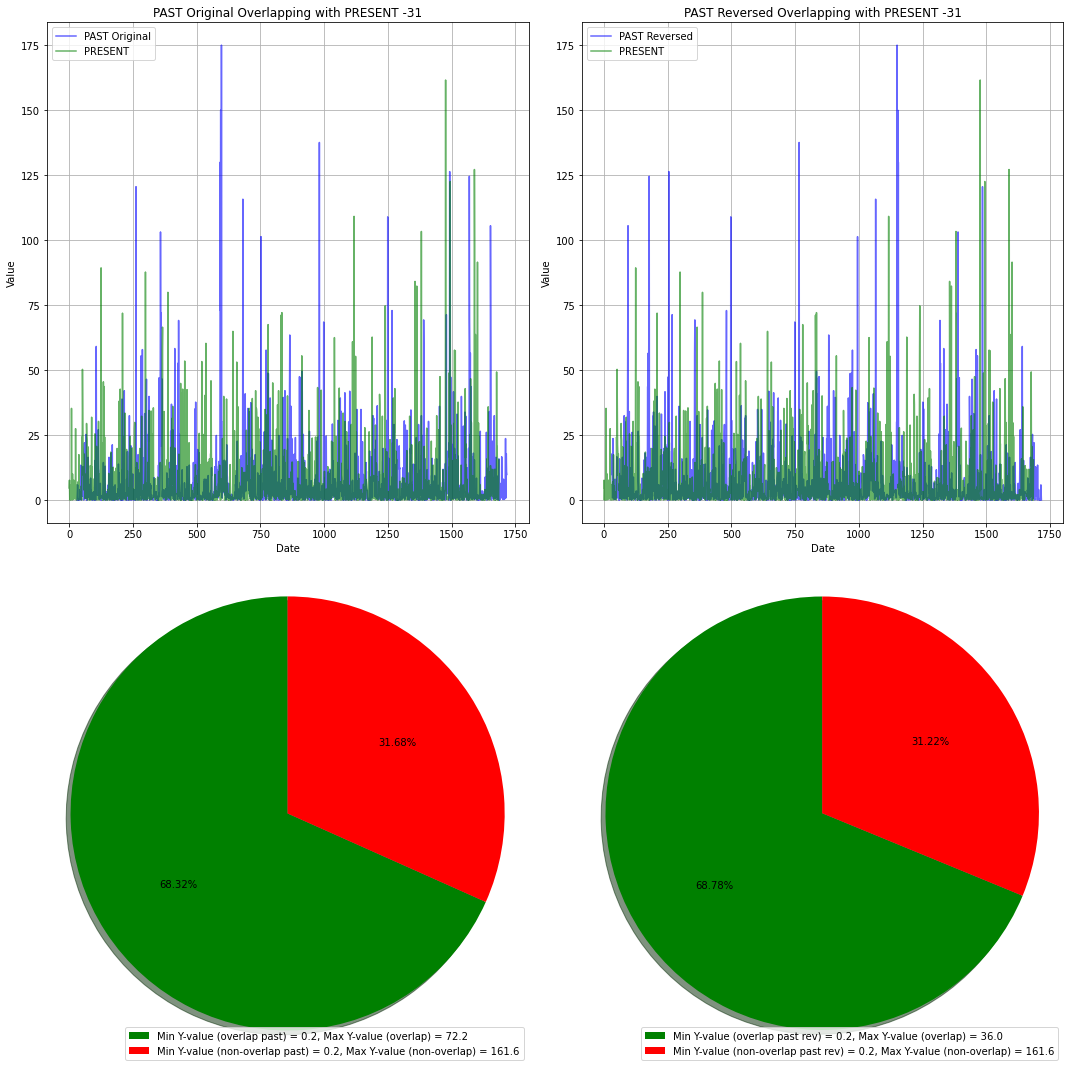

In [377]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded the data and calculated the percentage overlap values...

# Define the shift value (number of data points)
shift_value = -31  # Shifting by 50 data points

# Initialize the figure
plt.figure(figsize=(15, 15))

colors = ['green', 'red']

# First plot (top-left): Overlapping points between PAST and PRESENT with a shift
plt.subplot(2, 2, 1)
plt.plot(df_inter.index - shift_value, df_inter['VALUE'], label='PAST Original', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('PAST Original Overlapping with PRESENT -31')
plt.legend(loc='upper left')
plt.grid(True)

# Second plot (top-right): Overlapping points between PAST Reversed and PRESENT with a shift
plt.subplot(2, 2, 2)
plt.plot(df_interev.index - shift_value, df_interev['VALUE'], label='PAST Reversed', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('PAST Reversed Overlapping with PRESENT -31')
plt.legend(loc='upper left')
plt.grid(True)

# Calculate the shifted percentage overlap values
total_shifted_points = len(df_filtered.index) - shift_value
percentage_similarity_original_shifted = (len(similar_indices_original) / total_shifted_points) * 100
percentage_similarity_present_reversed_shifted = (len(similar_indices_present_reversed) / total_shifted_points) * 100

# Calculate the sizes for the pie charts
sizes_overlap_original = [percentage_similarity_original_shifted, 100 - percentage_similarity_original_shifted]
sizes_overlap_reversed = [percentage_similarity_present_reversed_shifted, 100 - percentage_similarity_present_reversed_shifted]


# Third plot: Pie chart for similarity overlap between PAST and PRESENT (bottom-left) with shifted data
plt.subplot(2, 2, 3)
labels_overlap_original = ['Overlap with PRESENT', 'No Overlap']
sizes_overlap_original = [percentage_similarity_original_shifted, 100 - percentage_similarity_original_shifted]
wedges_original, texts_original, autotexts_original = plt.pie(sizes_overlap_original, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
#plt.title('Percentage Overlap between PRESENT Filtered Data and PAST')
legend_labels_original = [
    f'Min Y-value (overlap past) = {min_similar_y_value_original}, Max Y-value (overlap) = {max_similar_y_value_original}',
    f'Min Y-value (non-overlap past) = {min_non_similar_y_value_original}, Max Y-value (non-overlap) = {max_non_similar_y_value_original}'
]
plt.legend(handles=wedges_original, labels=legend_labels_original, loc='lower right')

# Fourth plot: Pie chart for similarity overlap between PAST Reversed and PRESENT (bottom-right) with shifted data
plt.subplot(2, 2, 4)
labels_overlap_reversed = ['Overlap with PRESENT', 'No Overlap']
sizes_overlap_reversed = [percentage_similarity_present_reversed_shifted, 100 - percentage_similarity_present_reversed_shifted]
wedges_reversed, texts_reversed, autotexts_reversed = plt.pie(sizes_overlap_reversed, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
#plt.title('Percentage Overlap between PRESENT Filtered Data and PAST Reversed')
legend_labels_reversed = [
    f'Min Y-value (overlap past rev) = {min_similar_y_value_reversed}, Max Y-value (overlap) = {max_similar_y_value_reversed}',
    f'Min Y-value (non-overlap past rev) = {min_non_similar_y_value_reversed}, Max Y-value (non-overlap) = {max_non_similar_y_value_reversed}'
]
plt.legend(handles=wedges_reversed, labels=legend_labels_reversed, loc='lower right')

# Adjust the layout
plt.tight_layout()
plt.savefig('CTComparisonofFilteredDataMINUS31.jpg', dpi=300)

plt.show()

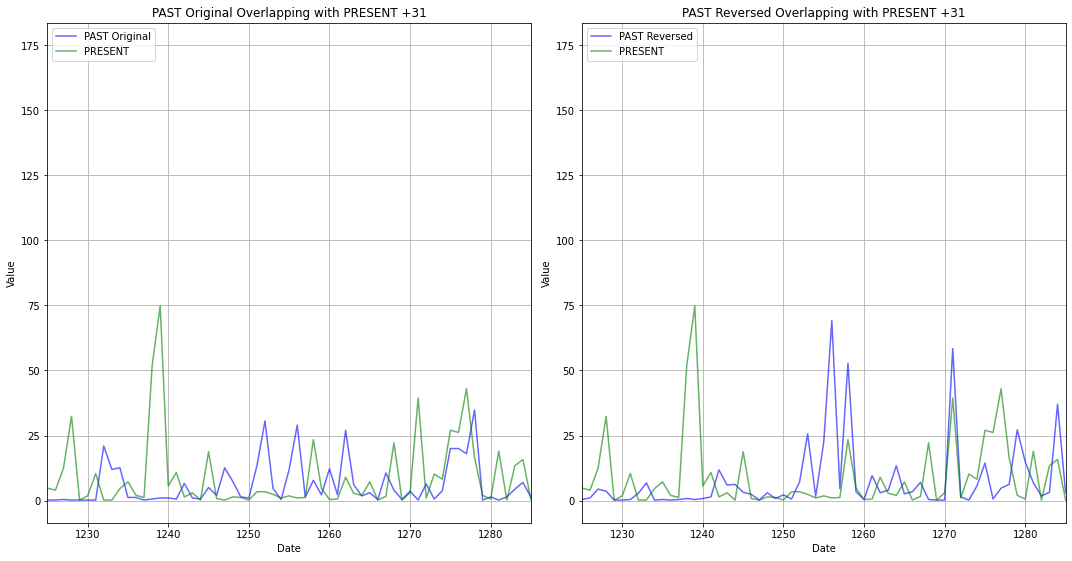

In [418]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've loaded the data and calculated the percentage overlap values...

# Define the shift value (number of data points)
shift_value = +31  # Shifting by 50 data points

# Initialize the figure
plt.figure(figsize=(15, 15))

colors = ['green', 'red']

# First plot (top-left): Overlapping points between PAST and PRESENT with a shift
plt.subplot(2, 2, 1)
plt.plot(df_inter.index - shift_value, df_inter['VALUE'], label='PAST Original', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('PAST Original Overlapping with PRESENT +31')
plt.legend(loc='upper left')
plt.xlim(1225,1285)
plt.grid(True)

# Second plot (top-right): Overlapping points between PAST Reversed and PRESENT with a shift
plt.subplot(2, 2, 2)
plt.plot(df_interev.index - shift_value, df_interev['VALUE'], label='PAST Reversed', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('PAST Reversed Overlapping with PRESENT +31')
plt.legend(loc='upper left')
plt.xlim(1225,1285)
plt.grid(True)

# Adjust the layout
plt.tight_layout()
plt.savefig('CTComparisonofFilteredDataPLUS31zoom.jpg', dpi=300)

plt.show()

In [ ]:
END

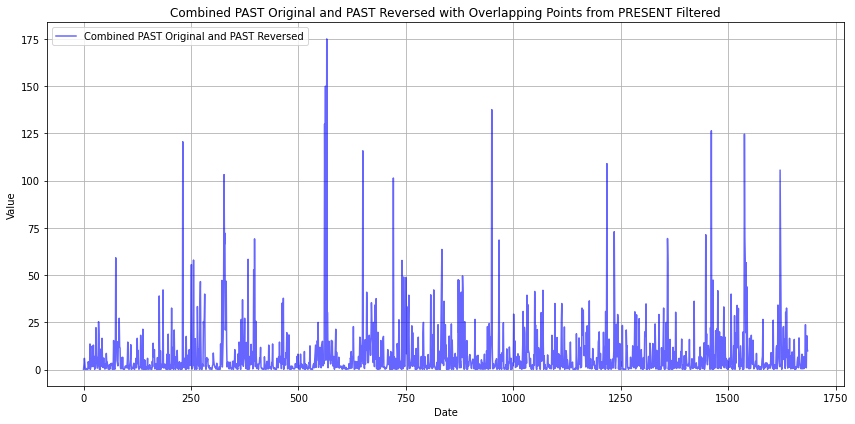

In [240]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12,6))

# Plot the entire combined dataset
plt.plot(combined_df.index, combined_df['VALUE'], label='Combined PAST Original and PAST Reversed', color='blue', alpha=0.6)

# Highlight the overlapping points from the PRESENT Filtered dataset
#plt.scatter([combined_df.index[i] for i in similar_indices_combined], [combined_df['VALUE'][i] for i in similar_indices_combined], color='red', marker='o', label=f'Overlapping Points with PRESENT Filtered')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Combined PAST Original and PAST Reversed with Overlapping Points from PRESENT Filtered')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


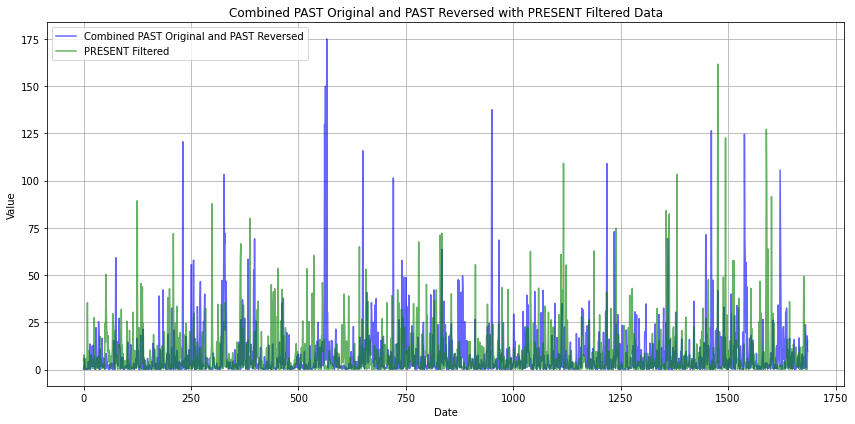

In [241]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12,6))

# Plot the entire combined dataset
plt.plot(combined_df.index, combined_df['VALUE'], label='Combined PAST Original and PAST Reversed', color='blue', alpha=0.6)

# Plot the PRESENT Filtered dataset
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT Filtered', color='green', alpha=0.6)

# Highlight the overlapping points from the PRESENT Filtered dataset
# plt.scatter([combined_df.index[i] for i in similar_indices_combined], [combined_df['VALUE'][i] for i in similar_indices_combined], color='red', marker='o', label=f'Overlapping Points with PRESENT Filtered')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Combined PAST Original and PAST Reversed with PRESENT Filtered Data')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


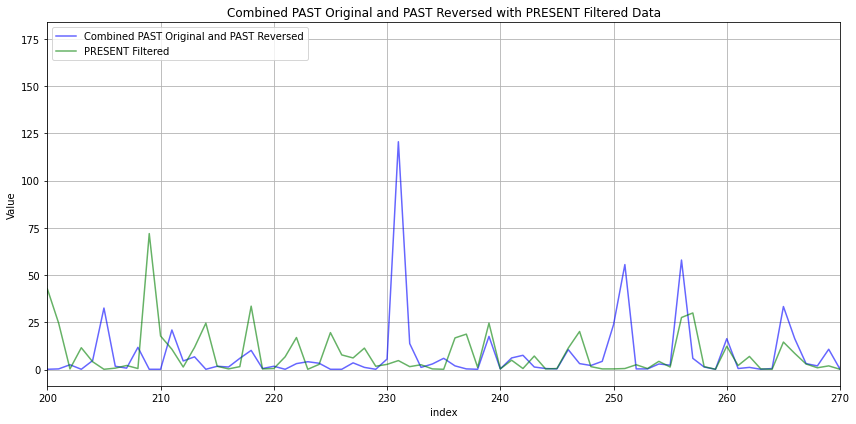

In [242]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12,6))

# Plot the entire combined dataset
plt.plot(combined_df.index, combined_df['VALUE'], label='Combined PAST Original and PAST Reversed', color='blue', alpha=0.6)

# Plot the PRESENT Filtered dataset
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT Filtered', color='green', alpha=0.6)


# Highlight the overlapping points from the PRESENT Filtered dataset
# plt.scatter([combined_df.index[i] for i in similar_indices_combined], [combined_df['VALUE'][i] for i in similar_indices_combined], color='red', marker='o', label=f'Overlapping Points with PRESENT Filtered')

plt.xlabel('index')
plt.ylabel('Value')
plt.title('Combined PAST Original and PAST Reversed with PRESENT Filtered Data')
plt.legend(loc='upper left')
plt.xlim(200,270)
plt.grid(True)

plt.tight_layout()
plt.show()


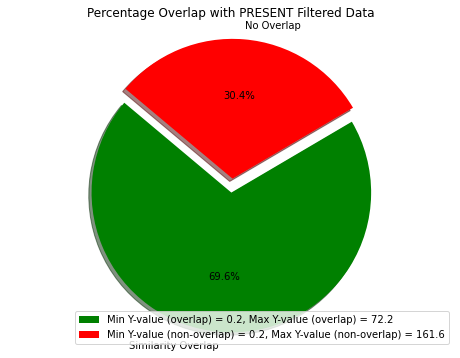

In [243]:
import matplotlib.pyplot as plt

# Extract Y-values that satisfy the similarity condition from the "PRESENT Filtered" dataset
similar_y_values = [df_filtered['VALUE'][i] for i in similar_indices_combined]

# Get the min and max of the overlapping Y-values
min_similar_y_value = min(similar_y_values)
max_similar_y_value = max(similar_y_values)

# Extract Y-values that do not satisfy the similarity condition from the "PRESENT Filtered" dataset
non_similar_indices = [i for i in df_filtered.index if i not in similar_indices_combined]
non_similar_y_values = [df_filtered['VALUE'][i] for i in non_similar_indices]

# Get the min and max of those non-overlapping Y-values
min_non_similar_y_value = min(non_similar_y_values)
max_non_similar_y_value = max(non_similar_y_values)

# Values for the pie chart
labels = ['Similarity Overlap', 'No Overlap']
sizes = [percentage_similarity, 100 - percentage_similarity]
colors = ['green', 'red']
explode = (0.1, 0)  # explode the 1st slice for emphasis

# Plotting
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Overlap with PRESENT Filtered Data')

# Legend
legend_labels = [
    f'Min Y-value (overlap) = {min_similar_y_value}, Max Y-value (overlap) = {max_similar_y_value}',
    f'Min Y-value (non-overlap) = {min_non_similar_y_value}, Max Y-value (non-overlap) = {max_non_similar_y_value}'
]

plt.legend(handles=wedges, labels=legend_labels, loc='lower right')

plt.show()


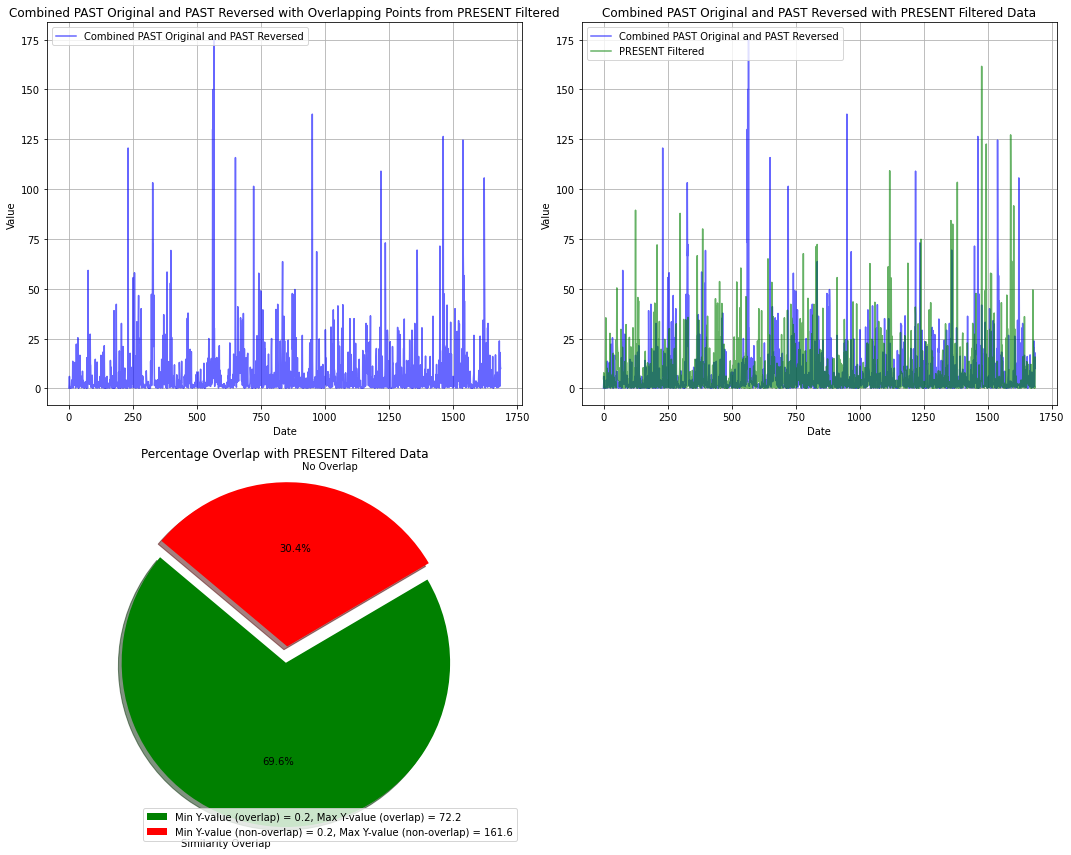

In [217]:
import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(15,12))

# First plot (top-left)
plt.subplot(2, 2, 1)
plt.plot(combined_df.index, combined_df['VALUE'], label='Combined PAST Original and PAST Reversed', color='blue', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Combined PAST Original and PAST Reversed with Overlapping Points from PRESENT Filtered')
plt.legend(loc='upper left')
plt.grid(True)

# Second plot (top-right)
plt.subplot(2, 2, 2)
plt.plot(combined_df.index, combined_df['VALUE'], label='Combined PAST Original and PAST Reversed', color='blue', alpha=0.6)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='PRESENT Filtered', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Combined PAST Original and PAST Reversed with PRESENT Filtered Data')
plt.legend(loc='upper left')
plt.grid(True)

# Pie chart (bottom-left)
plt.subplot(2, 2, 3)

# Extract Y-values that satisfy the similarity condition from the "PRESENT Filtered" dataset
similar_y_values = [df_filtered['VALUE'][i] for i in similar_indices_combined]
min_similar_y_value = min(similar_y_values)
max_similar_y_value = max(similar_y_values)

# Extract Y-values that do not satisfy the similarity condition
non_similar_indices = [i for i in df_filtered.index if i not in similar_indices_combined]
non_similar_y_values = [df_filtered['VALUE'][i] for i in non_similar_indices]
min_non_similar_y_value = min(non_similar_y_values)
max_non_similar_y_value = max(non_similar_y_values)

# Plot the pie chart
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage Overlap with PRESENT Filtered Data')
legend_labels = [
    f'Min Y-value (overlap) = {min_similar_y_value}, Max Y-value (overlap) = {max_similar_y_value}',
    f'Min Y-value (non-overlap) = {min_non_similar_y_value}, Max Y-value (non-overlap) = {max_non_similar_y_value}'
]
plt.legend(handles=wedges, labels=legend_labels, loc='lower right')

# Adjust the layout
plt.tight_layout()
plt.show()


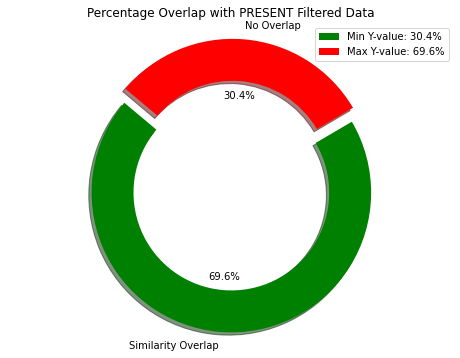

In [207]:
import matplotlib.pyplot as plt

# Values
labels = ['Similarity Overlap', 'No Overlap']
sizes = [percentage_similarity, 100 - percentage_similarity]
colors = ['green', 'red']
explode = (0.1, 0)  # explode the 1st slice for emphasis

# Calculate min and max y-values for the percentages
min_y_value = min(sizes)
max_y_value = max(sizes)

# Plotting
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops=dict(width=0.3))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage Overlap with PRESENT Filtered Data')

# Legend
legend_labels = [f'Min Y-value: {min_y_value:.1f}%', f'Max Y-value: {max_y_value:.1f}%']
plt.legend(handles=wedges, labels=legend_labels, loc="best")

plt.show()


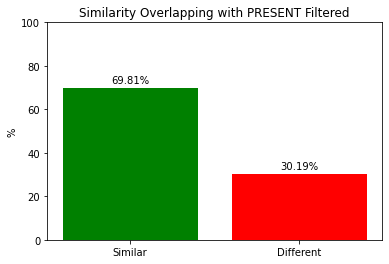

In [149]:
import numpy as np

# Calculate the percentage of similarity as before
total_values = len(df_inter) + len(df_interev)
total_similar_values = len(similar_indices_inter) + len(similar_indices_interev)
percentage_similarity = (total_similar_values / total_values) * 100

labels = ["Similar", "Different"]
values = [percentage_similarity, 100-percentage_similarity]

# Plot the bar chart
fig, ax = plt.subplots()

bars = ax.bar(labels, values, color=['green', 'red'])
ax.set_title("Similarity Overlapping with PRESENT Filtered")
ax.set_ylabel("%")
ax.set_ylim(0, 100)  # Set limit for better visualization

# Display the percentage on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


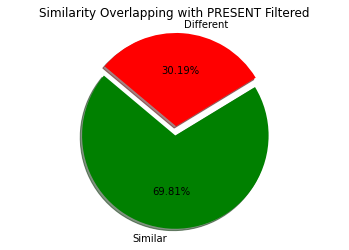

In [150]:
labels = ["Similar", "Different"]
sizes = [percentage_similarity, 100-percentage_similarity]
colors = ['green', 'red']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Plotting the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Similarity Overlapping with PRESENT Filtered")
plt.show()


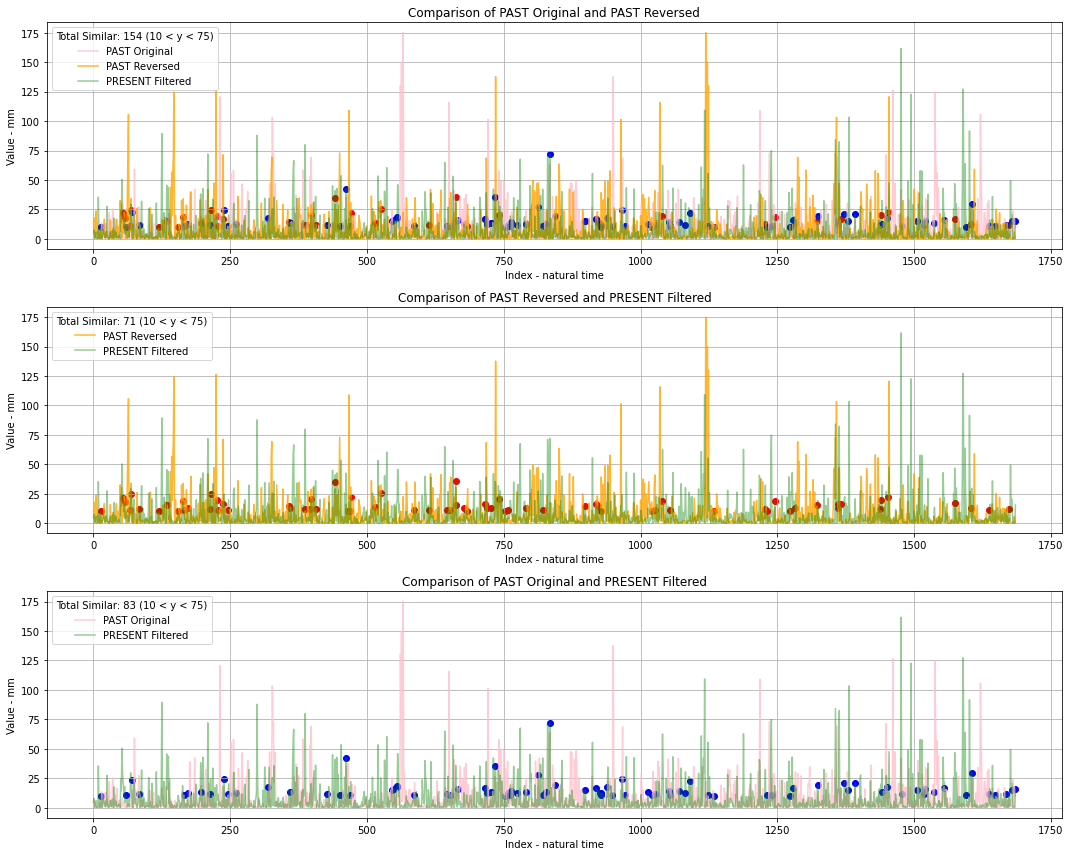

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_past.csv')
df_interev = pd.read_csv('CT_pastREV.csv')
df_filtered = pd.read_csv('CT_present.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

tolerance = 9.69  # Adjust this tolerance value as needed

def calculate_similarity_indices(df1, df2):
    return [idx for idx in df_filtered.index if abs(df1['VALUE'][idx] - df2['VALUE'][idx]) <= tolerance]

def calculate_similarity_within_range(indices, lower=10, upper=75):
    return [idx for idx in indices if lower < df_filtered['VALUE'][idx] < upper]

# Find similar y-values indices for all plots
similar_indices_interev = calculate_similarity_indices(df_interev, df_filtered)
similar_indices_inter = calculate_similarity_indices(df_inter, df_filtered)

# Filter indices for values between 10 and 75
similar_indices_interev_filtered = calculate_similarity_within_range(similar_indices_interev)
similar_indices_inter_filtered = calculate_similarity_within_range(similar_indices_inter)

# Create a 1x3 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# FIRST SUBPLOT
total_similarity_count_first = len(similar_indices_interev_filtered) + len(similar_indices_inter_filtered)
axes[0].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='pink', alpha=0.8)
axes[0].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
axes[0].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered', color='green', alpha=0.4)
axes[0].scatter(similar_indices_interev_filtered, df_filtered['VALUE'][similar_indices_interev_filtered], color='red', marker='o')
axes[0].scatter(similar_indices_inter_filtered, df_filtered['VALUE'][similar_indices_inter_filtered], color='blue', marker='o')
axes[0].set_xlabel('Index - natural time')
axes[0].set_ylabel('Value - mm')
axes[0].set_title('Comparison of PAST Original and PAST Reversed')
axes[0].grid(True)
axes[0].legend(loc='upper left', title=f"Total Similar: {total_similarity_count_first} (10 < y < 75)")

# SECOND SUBPLOT
axes[1].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
axes[1].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered', color='green', alpha=0.4)
axes[1].scatter(similar_indices_interev_filtered, df_filtered['VALUE'][similar_indices_interev_filtered], color='red', marker='o')
axes[1].set_xlabel('Index - natural time')
axes[1].set_ylabel('Value - mm')
axes[1].set_title('Comparison of PAST Reversed and PRESENT Filtered')
axes[1].grid(True)
axes[1].legend(loc='upper left', title=f"Total Similar: {len(similar_indices_interev_filtered)} (10 < y < 75)")

# THIRD SUBPLOT
axes[2].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='pink', alpha=0.8)
axes[2].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered', color='green', alpha=0.4)
axes[2].scatter(similar_indices_inter_filtered, df_filtered['VALUE'][similar_indices_inter_filtered], color='blue', marker='o')
axes[2].set_xlabel('Index - natural time')
axes[2].set_ylabel('Value - mm')
axes[2].set_title('Comparison of PAST Original and PRESENT Filtered')
axes[2].grid(True)
axes[2].legend(loc='upper left', title=f"Total Similar: {len(similar_indices_inter_filtered)} (10 < y < 75)")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



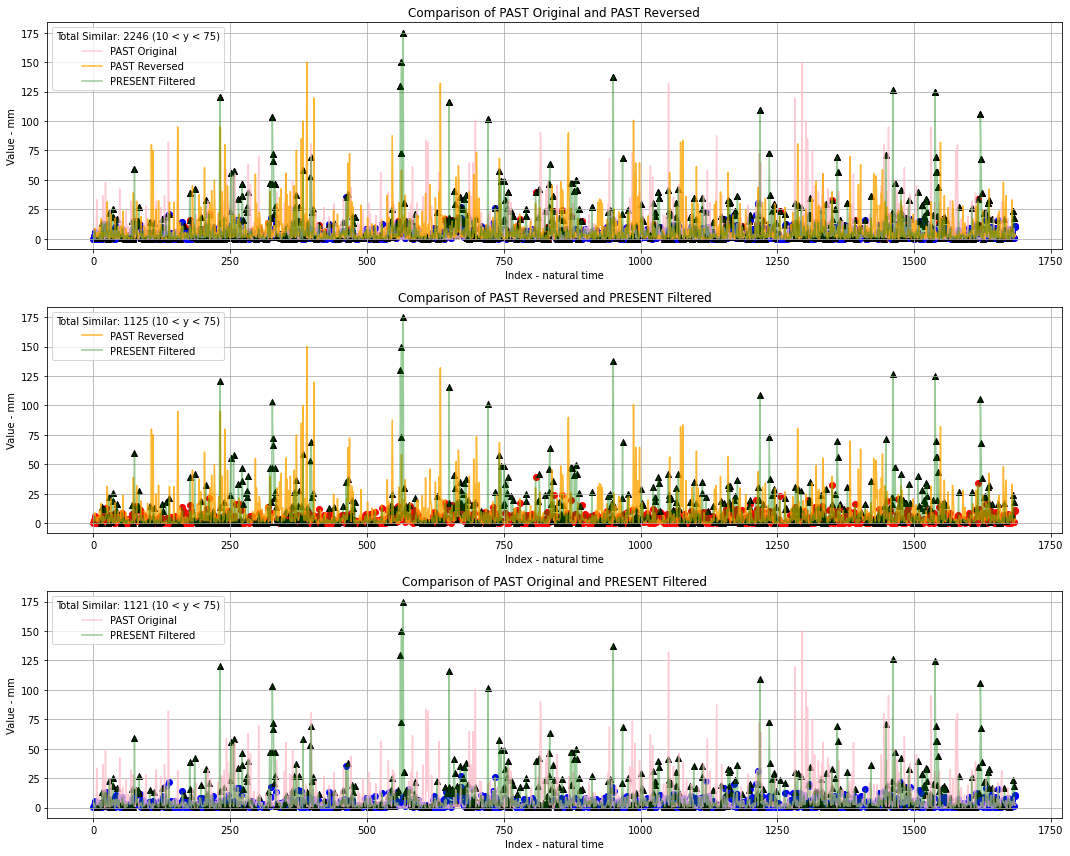

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_pastpast.csv')
df_interev = pd.read_csv('CT_pastpastREV.csv')
df_filtered = pd.read_csv('CT_past.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

tolerance = 9.69

def calculate_similarity_indices(df1, df2):
    return [idx for idx in df_filtered.index if abs(df1['VALUE'][idx] - df2['VALUE'][idx]) <= tolerance]

def calculate_non_similarity_indices(df1, df2):
    return [idx for idx in df_filtered.index if abs(df1['VALUE'][idx] - df2['VALUE'][idx]) > tolerance]

def calculate_similarity_within_range(indices, lower=0, upper=300):
    return [idx for idx in indices if lower < df_filtered['VALUE'][idx] < upper]

# Similarity and non-similarity indices calculation
similar_indices_interev = calculate_similarity_indices(df_interev, df_filtered)
similar_indices_inter = calculate_similarity_indices(df_inter, df_filtered)

non_similar_indices_interev = calculate_non_similarity_indices(df_interev, df_filtered)
non_similar_indices_inter = calculate_non_similarity_indices(df_inter, df_filtered)

similar_indices_interev_filtered = calculate_similarity_within_range(similar_indices_interev)
similar_indices_inter_filtered = calculate_similarity_within_range(similar_indices_inter)

# Create a 1x3 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# FIRST SUBPLOT
total_similarity_count_first = len(similar_indices_interev_filtered) + len(similar_indices_inter_filtered)
axes[0].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='pink', alpha=0.8)
axes[0].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
axes[0].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered', color='green', alpha=0.4)
axes[0].scatter(similar_indices_interev_filtered, df_filtered['VALUE'][similar_indices_interev_filtered], color='red', marker='o')
axes[0].scatter(similar_indices_inter_filtered, df_filtered['VALUE'][similar_indices_inter_filtered], color='blue', marker='o')
axes[0].scatter(non_similar_indices_interev, df_filtered['VALUE'][non_similar_indices_interev], color='black', marker='^')
axes[0].scatter(non_similar_indices_inter, df_filtered['VALUE'][non_similar_indices_inter], color='black', marker='^')
axes[0].set_xlabel('Index - natural time')
axes[0].set_ylabel('Value - mm')
axes[0].set_title('Comparison of PAST Original and PAST Reversed')
axes[0].grid(True)
axes[0].legend(loc='upper left', title=f"Total Similar: {total_similarity_count_first} (10 < y < 75)")

# SECOND SUBPLOT
axes[1].plot(df_interev.index, df_interev['VALUE'], label='PAST Reversed', color='orange', alpha=0.8)
axes[1].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered', color='green', alpha=0.4)
axes[1].scatter(similar_indices_interev_filtered, df_filtered['VALUE'][similar_indices_interev_filtered], color='red', marker='o')
axes[1].scatter(non_similar_indices_interev, df_filtered['VALUE'][non_similar_indices_interev], color='black', marker='^')
axes[1].set_xlabel('Index - natural time')
axes[1].set_ylabel('Value - mm')
axes[1].set_title('Comparison of PAST Reversed and PRESENT Filtered')
axes[1].grid(True)
axes[1].legend(loc='upper left', title=f"Total Similar: {len(similar_indices_interev_filtered)} (10 < y < 75)")

# THIRD SUBPLOT
axes[2].plot(df_inter.index, df_inter['VALUE'], label='PAST Original', color='pink', alpha=0.8)
axes[2].plot(df_filtered.index, df_filtered['VALUE'], label=f'PRESENT Filtered', color='green', alpha=0.4)
axes[2].scatter(similar_indices_inter_filtered, df_filtered['VALUE'][similar_indices_inter_filtered], color='blue', marker='o')
axes[2].scatter(non_similar_indices_inter, df_filtered['VALUE'][non_similar_indices_inter], color='black', marker='^')
axes[2].set_xlabel('Index - natural time')
axes[2].set_ylabel('Value - mm')
axes[2].set_title('Comparison of PAST Original and PRESENT Filtered')
axes[2].grid(True)
axes[2].legend(loc='upper left', title=f"Total Similar: {len(similar_indices_inter_filtered)} (10 < y < 75)")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


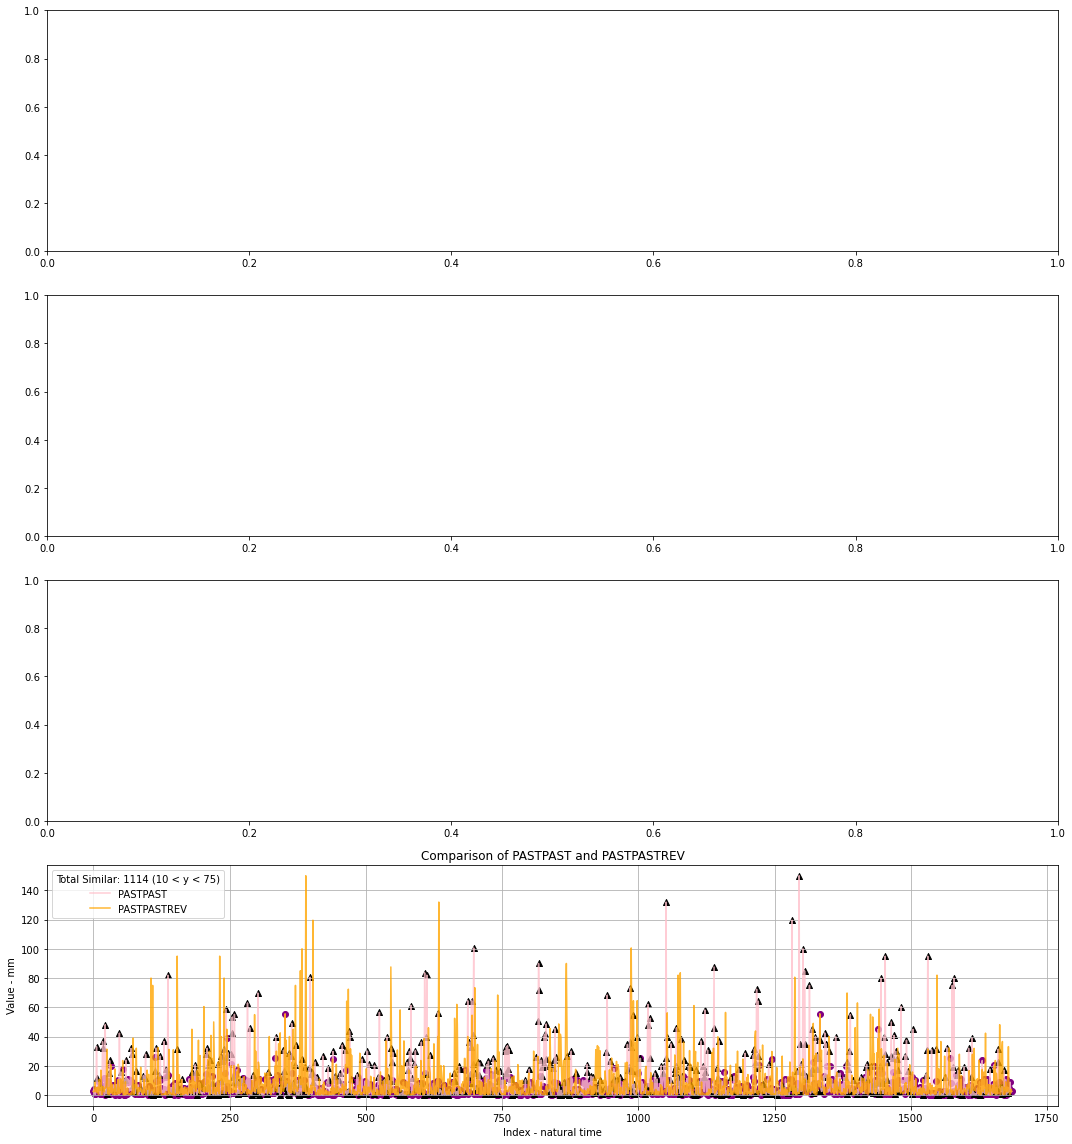

In [146]:
#... (rest of the imports and data loading)

# Similarity and non-similarity indices calculation
similar_indices_inter_interev = calculate_similarity_indices(df_inter, df_interev)
non_similar_indices_inter_interev = calculate_non_similarity_indices(df_inter, df_interev)
similar_indices_inter_interev_filtered = calculate_similarity_within_range(similar_indices_inter_interev)

# Create a 4x1 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 16))

#... (rest of the code for first three subplots)

# FOURTH SUBPLOT
axes[3].plot(df_inter.index, df_inter['VALUE'], label='PASTPAST', color='pink', alpha=0.8)
axes[3].plot(df_interev.index, df_interev['VALUE'], label='PASTPASTREV', color='orange', alpha=0.8)
axes[3].scatter(similar_indices_inter_interev_filtered, df_inter['VALUE'][similar_indices_inter_interev_filtered], color='purple', marker='o')
axes[3].scatter(non_similar_indices_inter_interev, df_inter['VALUE'][non_similar_indices_inter_interev], color='black', marker='^')
axes[3].set_xlabel('Index - natural time')
axes[3].set_ylabel('Value - mm')
axes[3].set_title('Comparison of PASTPAST and PASTPASTREV')
axes[3].grid(True)
axes[3].legend(loc='upper left', title=f"Total Similar: {len(similar_indices_inter_interev_filtered)} (10 < y < 75)")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


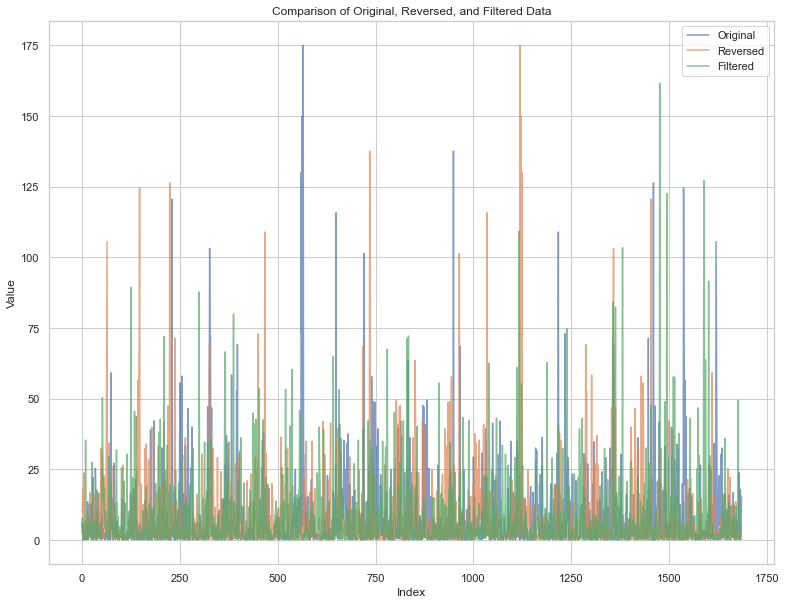

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV files
df_inter = pd.read_csv('CTpast.csv')
df_interev = pd.read_csv('CTpastREV.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])

# Filtered data from CT_rbi_above0.4.csv
df_filtered = pd.read_csv('CTpresent.csv')
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

# Filter the data between 2002 and 2022
start_date = '2002-01-01'
end_date = '2022-12-31'
df_filtered = df_filtered[(df_filtered['DATE'] >= start_date) & (df_filtered['DATE'] <= end_date)]

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot using Seaborn
plt.figure(figsize=(13, 10))
sns.lineplot(data=df_inter, x=df_inter.index, y='VALUE', label='Original', alpha=0.7)
sns.lineplot(data=df_interev, x=df_interev.index, y='VALUE', label='Reversed', alpha=0.7)
sns.lineplot(data=df_filtered, x=df_filtered.index, y='VALUE', label='Filtered', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of Original, Reversed, and Filtered Data')
plt.legend()
plt.show()


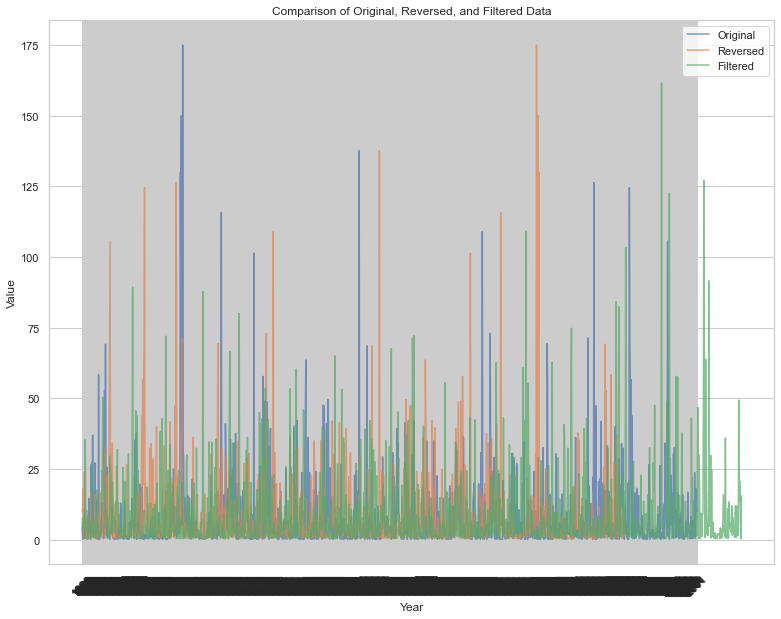

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_rbi_above0.csv')
df_interev = pd.read_csv('CT_rbi_above0REV.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])

# Filtered data from 3170_filtered.csv
df_filtered = pd.read_csv('CT_rbi_above0.4.csv')
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

# Filter the data between 2002 and 2022
start_date = '2002-01-01'
end_date = '2022-12-31'
df_filtered = df_filtered[(df_filtered['DATE'] >= start_date) & (df_filtered['DATE'] <= end_date)]

# Plot the data with transparency
plt.figure(figsize=(13, 10))
plt.plot(df_inter.index, df_inter['VALUE'], label='Original', alpha=0.7)
plt.plot(df_interev.index, df_interev['VALUE'], label='Reversed', alpha=0.7)
plt.plot(df_filtered.index, df_filtered['VALUE'], label='Filtered', alpha=0.7)  # Overlay filtered data

# Set x-axis ticks and labels
x_ticks = range(len(df_inter))
x_labels = df_inter['DATE'].dt.year.tolist()  # Use years for x-axis labels
plt.xticks(x_ticks, x_labels, rotation=45)  # Rotate x-axis labels for better visibility

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Comparison of Original, Reversed, and Filtered Data')
plt.legend()
plt.grid(True)
plt.show()


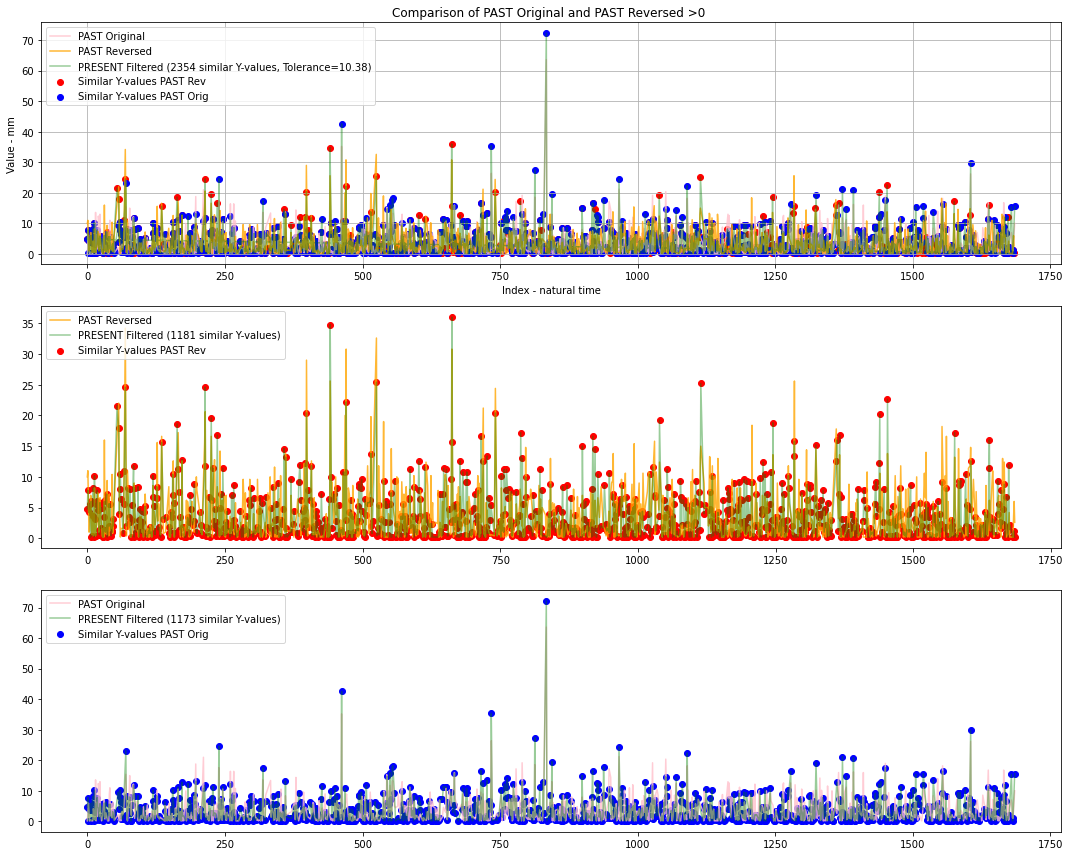

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
df_inter = pd.read_csv('CT_past.csv')
df_interev = pd.read_csv('CT_pastREV.csv')
df_filtered = pd.read_csv('CT_present.csv')

# Convert the DATE column to datetime format
df_inter['DATE'] = pd.to_datetime(df_inter['DATE'])
df_interev['DATE'] = pd.to_datetime(df_interev['DATE'])
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

# Find similar y-values indices for PAST Reversed
similar_indices_interev = []
tolerance = 10.38

for idx in df_filtered.index:
    if abs(df_interev['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_interev.append(idx)

# Find similar y-values indices for PAST Original and PRESENT Filtered
similar_indices_inter = []

for idx in df_filtered.index:
    if abs(df_inter['VALUE'][idx] - df_filtered['VALUE'][idx]) <= tolerance:
        similar_indices_inter.append(idx)

# Create a 1x3 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# Calculate the total count of similarity for the first plot
total_similarity_count_first = len(similar_indices_interev) + len(similar_indices_inter)

# For the first subplot, display only values that satisfy the tolerance condition
plot1 = axes[0].plot([df_inter.index[i] for i in similar_indices_inter], [df_inter['VALUE'][i] for i in similar_indices_inter], label='PAST Original', color='pink', alpha=0.8)
plot2 = axes[0].plot([df_interev.index[i] for i in similar_indices_interev], [df_interev['VALUE'][i] for i in similar_indices_interev], label='PAST Reversed', color='orange', alpha=0.8)
plot3 = axes[0].plot([df_filtered.index[i] for i in similar_indices_interev + similar_indices_inter], [df_filtered['VALUE'][i] for i in similar_indices_interev + similar_indices_inter], label=f'PRESENT Filtered ({total_similarity_count_first} similar Y-values)', color='green', alpha=0.4)
scatter1 = axes[0].scatter(similar_indices_interev, [df_filtered['VALUE'][i] for i in similar_indices_interev], color='red', marker='o')
scatter2 = axes[0].scatter(similar_indices_inter, [df_filtered['VALUE'][i] for i in similar_indices_inter], color='blue', marker='o')
axes[0].set_xlabel('Index - natural time')
axes[0].set_ylabel('Value - mm')
axes[0].set_title('Comparison of PAST Original and PAST Reversed >0 ')
#axes[0].set_ylim(10,70)
axes[0].grid(True)
axes[0].legend(handles=[plot1[0], plot2[0], plot3[0], scatter1, scatter2],
               labels=['PAST Original', 'PAST Reversed', f'PRESENT Filtered ({total_similarity_count_first} similar Y-values, Tolerance={tolerance})', 'Similar Y-values PAST Rev', 'Similar Y-values PAST Orig'],
               loc='upper left')

# For the second subplot, display only values that satisfy the tolerance condition for PAST Reversed and PRESENT Filtered
plot4 = axes[1].plot([df_interev.index[i] for i in similar_indices_interev], [df_interev['VALUE'][i] for i in similar_indices_interev], label='PAST Reversed', color='orange', alpha=0.8)
plot5 = axes[1].plot([df_filtered.index[i] for i in similar_indices_interev], [df_filtered['VALUE'][i] for i in similar_indices_interev], label=f'PRESENT Filtered ({len(similar_indices_interev)} similar Y-values)', color='green', alpha=0.4)
scatter3 = axes[1].scatter(similar_indices_interev, [df_filtered['VALUE'][i] for i in similar_indices_interev], color='red', marker='o')
axes[1].legend(handles=[plot4[0], plot5[0], scatter3],
               labels=['PAST Reversed', f'PRESENT Filtered ({len(similar_indices_interev)} similar Y-values)', 'Similar Y-values PAST Rev'],
               loc='upper left')

# For the third subplot, display only values that satisfy the tolerance condition for PAST Original and PRESENT Filtered
plot6 = axes[2].plot([df_inter.index[i] for i in similar_indices_inter], [df_inter['VALUE'][i] for i in similar_indices_inter], label='PAST Original', color='pink', alpha=0.8)
plot7 = axes[2].plot([df_filtered.index[i] for i in similar_indices_inter], [df_filtered['VALUE'][i] for i in similar_indices_inter], label=f'PRESENT Filtered ({len(similar_indices_inter)} similar Y-values)', color='green', alpha=0.4)
scatter4 = axes[2].scatter(similar_indices_inter, [df_filtered['VALUE'][i] for i in similar_indices_inter], color='blue', marker='o')
axes[2].legend(handles=[plot6[0], plot7[0], scatter4],
               labels=['PAST Original', f'PRESENT Filtered ({len(similar_indices_inter)} similar Y-values)', 'Similar Y-values PAST Orig'],
               loc='upper left')


# Adjust layout to prevent overlap
plt.tight_layout()
#plt.savefig('CTComparisonofFilteredData0mmzoom.jpg', dpi=300)

plt.show()
